<span style="font-size: 6px; float:right">Notebook created by <a style="text-decoration: none; color:#000;" href="https://s.zymon.org">Szymon Woźniak</a></span>
<br>
<center><font size="6"><b>Digital Signal Processing Lab</b></font></center>
<br />
<center><font size="5"><b><u>Discrete Fourier Transform</u></b></font></center>
<span style="float:right;"><b>Notebook version:</b> 1.1.0a</span>

My name is Mariusz Więcławek.
If you have collaborated with other peers while working on this notebooke, please annouce theirs names below.
- Michał Wożniak
- Adrian Kortyla
- Michał Hasior

# Introduction

Discrete Fourier Transform is the basic tool for discrete signals processing.
In this notebook you will have to implement a few exercises that will expose you to frequency domain of cyclic signals.

## Reading list

Before working with the notebook, you might find it useful to become acquainted with the following materials:
- <span style="font-size: 12px">Section **8.1 Widmo Fouriera sygnałów dyskretnych** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **8.2 Przykłady dyskretnych transformat Fouriera sygnałow** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **8.3 Interpretacja dyskretnego przekształcenia Fouriera** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **8.5 Dyskretne okna czasowe** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **8.6 Przykłady analizy częstotliwościowej z wykorzystaniem funkcji okien** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **9.1 Meetoda bezpośrednia** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **9.5 Szybka transformacja Fouriera - algorytm radix-2** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>

Students who aim for a good understanding of basic signal processing tools should also read the following sections:
- <span style="font-size: 12px">Section **16.3 Krótkoczasowa transformacj Fouriera** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>

## Notebook setup

In [2]:
# For time measurements
import time

# NumPy package
import numpy as np

# Frequency response
from scipy.signal import freqz

# tqdm for displaying nice progress bar
from tqdm.auto import tqdm

# Matplotlib for plotting figures
from matplotlib import pyplot as plt

# Practical problem set

## Discrete Fourier Transform (DFT)

Implement [DFT](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) operation.
You should implement it using two `for` loops (no vectorization here!).

<div style="border: solid; padding: 20px">
<b style="font-size: 12pt">Discrete Fourier Transform (DFT)</b>
$$\large
    \hat{\mathbf{x}}[k] = \sum_{n=0}^{N-1} \mathbf{x}[n] \exp\left( -j2\pi \frac{kn}{N} \right)
$$
</div>

In [3]:
def dft(x):
    """
    This function should compute Discrete Fourier Transform
    using naive implementation of the formula (direct implementation of the DFT formula).
    Don't hesitate to use for loops (hint: there should be two for loops).
    
    Parameters
    ----------
    x: numpy array of shape (N, )
        Vector containing samples of discrete signal in time domain.
    
    Returns
    -------
    X: numpy array of shape (N, )
        Vector containing samples of discrete signal in frequency domain.
    """
    
    X = []
    for k in range(len(x)):
        sum = 0
        for n in range(len(x)):
            sum += x[n] * np.exp(complex(0,-2*np.pi*k*n/len(x)))
        X.append(sum)
    X = np.array(X) 
    return X

    """
    Implementacja na macierzach
    ---------------------------
    
    N = len(x)
    n = np.arange(N)   # Indeks próbek
    k = n.reshape((N, 1))   # Indeks częstotliwościowy
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)    # mnożenie macierzy e przez 
    
    return X
    """

### Verify your implementation

In order to verify if the implementation compute correctly DFT we use reference implementation `np.fft.fft` from numpy and compare RMSE between two outputs. If the the RMSE will be small enought it is probably implemented correctly.

RMSE: 0.0
Your implementation succeeded


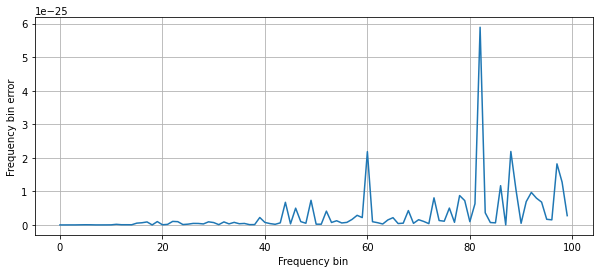

In [4]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Compute DFT using your implementation
X = dft(x)

# Compute DFT using reference implementation from numpy
X_ref = np.fft.fft(x)

# Error between your implementation and reference implementation
X_err = np.abs(X - X_ref)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err)**2)

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

## Amplitude and Phase of DFT

In this task you have to finish implementation of the function which plots amplitude and phase of the DFT.
The plot should show actual frequencies and amplitudes of the sinusoidal components of the discrete signal.

You goal is to implement computation of three vectors inside function `plot_DFT`:
* `freqs` is a vector that contain frequencies of each bin (we are interested in actual frequency in Hertz unit not in index of bin).
* `A` is a vector that contains amplitudes for discrete frequnecy components.
* `phase` is a vector that contains phase for discrete frequncy componensts.

You should consider __all possible corner cases__.

For the following signal sampled with sampling frequency $f_s = 16$ [Hz] within time interval $[0, 1)$

$$
    x(t) = 1 + 4\cos\left(14\pi t + \frac{\pi}{2}\right) + \cos \left(8\pi{}t - \frac{\pi}{2} \right)
$$

the plot should looks like this one below

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAA+gAAAH0CAYAAACuKActAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzde1iUdf7/8deACFJAIaCoaJZuHqgUT6kdPCSKZeq30t+WaaZumplKrclWq3ZyO62u9pUyU3Jdy23N0s0IWs+Flqdc85AZLa1AiiaYBxiY+f3hl8kJVA43zn3fPB/X5RVzzz33/f7Mm7uZF/fJ4Xa73QIAAAAAAD7l5+sCAAAAAAAAAR0AAAAAAFMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACdTxdQFm4HK5lJ2drZCQEDkcDl+XAwAAAACwILfbrRMnTqhRo0by86v8/nACuqTs7GzFxMT4ugwAAAAAgA388MMPatKkSaVfR0CXFBISIunsmxgaGurjas7P6XQqLS1N8fHxCggI8HU5qCT6Z130zrronbXRP+uid9ZF76yN/vleQUGBYmJiPBmzsgjokuew9tDQUNMH9ODgYIWGhrLBWRD9sy56Z130ztron3XRO+uid9ZG/8yjqqdOE9BhCiUut77IPKbDJ84oKiRInZuHy9+P6wEAAAAAtV1tygqmC+gzZ87U+++/r3379qlevXrq1q2bXnzxRV177bUXfN3y5cv19NNP6+DBg7rmmmv0/PPPa/DgwZeoalRH6u4czVi1Rzn5ZzzTosOCNG1AG/WLjfZhZQAAAAB8qbZlBdPdZm39+vUaP368Nm/erPT0dBUXFys+Pl4nT54872syMjI0dOhQ3X///frqq690//33a8iQIdqyZcslrBxVkbo7R+OWbPfa4CQpN/+Mxi3ZrtTdOT6qDAAAAIAv1casYLqAnpqaqgceeEBt27bVDTfcoEWLFikrK0vbtm0772tmz56tPn36KCkpSa1atVJSUpJ69+6t2bNnX8LKUVklLrdmrNojdznPlU6bsWqPSlzlzQEAAADArmprVjDdIe6/lp+fL0kKDw8/7zwZGRmaPHmy17S+ffueN6AXFhaqsLDQ87igoEDS2YsqOJ3O6pZcY0prM3ONlbEl81iZv4adyy0pJ/+MMr49rC7Nz99/q7Bb/2oTemdd9M7a6J910TvronfWZqf+WTUrVPe9d7jdbtP+ycHtdmvgwIH66aeftHHjxvPOV7duXaWkpOjee+/1TFu6dKlGjhzpFcRLTZ8+XTNmzCgzfenSpQoODjameFzUtjyHFh/wv+h8w1uWqEOEaX9NAQAAABjMqlnh1KlTuvfee5Wfn1+lO4SZeg/6I488ol27dmnTpk0XnffXl7F3u93nvbR9UlKSEhMTPY9L71UXHx9v+tuspaenq0+fPra4bUL9zGNafGDrReeLv7mLqf4qVlV2619tQu+si95ZG/2zLnpnXfTO2uzUP6tmhdKjs6vKtAF9woQJWrlypTZs2KAmTZpccN6GDRsqNzfXa9rhw4fVoEGDcucPDAxUYGBgmekBAQGW+EW2Sp0X07VFlKLDgpSbf6bcc0sckhqGBalriyhb3UbBLv2rjeidddE7a6N/1kXvrIveWZsd+mfVrFDd9910F4lzu9165JFH9P7772vNmjVq3rz5RV/TtWtXpaene01LS0tTt27daqpMGMDfz6FpA9pIOruBnav08bQBbUy1wQEAAACoebU1K5guoI8fP15LlizR0qVLFRISotzcXOXm5ur06dOeeYYPH66kpCTP44kTJyotLU0vvvii9u3bpxdffFGffvqpJk2a5IshoBL6xUYreVicokK9j2hoGBak5GFxtry3IQAAAICLq41ZwXSHuCcnJ0uSevTo4TV90aJFeuCBByRJWVlZ8vP75W8L3bp107vvvqunnnpKTz/9tK655hotW7ZMXbp0uVRloxr6xUare4sIXTc9TZKUMrKTbm4Zabu/hgEAAAConNqWFUwX0CtyUfl169aVmXb33Xfr7rvvroGKcCmcu4F1bh5u2w0OAAAAQOXUpqxgukPcAQAAAACojQjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAHTBfQNGzZowIABatSokRwOhz744IMLzr9u3To5HI4y//bt23eJKgYAAAAAoPrq+LqAXzt58qRuuOEGjRw5UnfddVeFX7d//36FhoZ6HkdGRtZEeQAAAAAA1AjTBfSEhAQlJCRU+nVRUVG64ooraqAiAAAAAABqnukCelW1b99eZ86cUZs2bfTUU0+pZ8+e5523sLBQhYWFnscFBQWSJKfTKafTWeO1VlVpbWausaqczuJzfnbK6XD7sJqaYef+2R29sy56Z230z7ronXXRO2uza/+slBWq+9473G63aUfncDi0YsUKDRo06Lzz7N+/Xxs2bFCHDh1UWFiov/71r3r99de1bt063XLLLeW+Zvr06ZoxY0aZ6UuXLlVwcLBh9aPiCkukKV+c/XvRS52LFejv44IAAAAAmIKVssKpU6d07733Kj8/3+sU7IqyfEAvz4ABA+RwOLRy5cpyny9vD3pMTIzy8vKq9CZeKk6nU+np6erTp48CAgJ8XY6hThUV64Zn10iSvnq6l4Lr2ubgDg8798/u6J110Ttro3/WRe+si95Zm137Z6WsUFBQoIiIiCoHdPOOrBpuvPFGLVmy5LzPBwYGKjAwsMz0gIAAS/wiW6XOyghwO375OSBAAQG2/NWUZM/+1Rb0zrronbXRP+uid9ZF76zNbv2zUlao7vtuutusGWHHjh2Kjo72dRkAAAAAAFSY6f708PPPP+vbb7/1PM7MzNTOnTsVHh6upk2bKikpSYcOHdLixYslSbNnz9ZVV12ltm3bqqioSEuWLNHy5cu1fPlyXw0BAAAAAIBKM11A37p1q9cV2BMTEyVJI0aMUEpKinJycpSVleV5vqioSI8//rgOHTqkevXqqW3btvroo4/Uv3//S147AAAAAABVZbqA3qNHD13ounUpKSlej6dMmaIpU6bUcFUAAAAAANQsW56DDgAAAACA1RDQAQAAAAAwAcMC+vHjx7VgwQIlJSXp2LFjkqTt27fr0KFDRq0CAAAAAADbMuQc9F27dum2225TWFiYvv/+e40ZM0bh4eFasWKF/vOf/3iuuA4AAAAAAMpnyB70xMREPfDAAzpw4ICCgoI80xMSErRhwwYjVgEAAAAAgK0ZEtC//PJLPfTQQ2WmN27cWLm5uUasAgAAAAAAWzMkoAcFBamgoKDM9P379ysyMtKIVQAAAAAAYGuGBPSBAwfqmWeekdPplCQ5HA5lZWVp6tSpuuuuu4xYBQAAAAAAtmZIQH/llVd05MgRRUVF6fTp07r11lvVokULhYSE6PnnnzdiFQAAAAAA2JohV3EPDQ3Vpk2btGbNGm3fvl0ul0txcXG67bbbjFg8AAAAAAC2Z0hAL9WrVy/16tXLyEUCAAAAAFArVDmgz5kzp8LzPvroo1VdDQAAAAAAtUKVA/qsWbO8Hh85ckSnTp3SFVdcIUk6fvy4goODFRUVRUAHAAAAAOAiqnyRuMzMTM+/559/Xu3atdPevXt17NgxHTt2THv37lVcXJyeffZZI+sFAAAAAMCWDLmK+9NPP625c+fq2muv9Uy79tprNWvWLD311FNGrAIAAAAAAFszJKDn5OR47oF+rpKSEv34449GrAIAAAAAAFszJKD37t1bY8aM0datW+V2uyVJW7du1UMPPcSt1gAAAAAAqABDAvrChQvVuHFjde7cWUFBQQoMDFSXLl0UHR2tBQsWGLEKAAAAAABszZD7oEdGRmr16tX65ptvtG/fPrndbrVu3Vq/+c1vjFg8AAAAAAC2Z0hAL/Wb3/yGUA4AAAAAQBUYEtAffPDBCz6/cOFCI1YDAAAAAIBtGRLQf/rpJ6/HTqdTu3fv1vHjx9WrVy8jVgEAAAAAgK0ZEtBXrFhRZprL5dLDDz+sq6++2ohVAAAAAABga4Zcxb3cBfv5afLkyZo1a1ZNrQIAAAAAANuosYAuSQcPHlRxcXFNrgIAAAAAAFsw5BD3xMREr8dut1s5OTn66KOPNGLECCNWAQAAAACArRkS0Hfs2OH12M/PT5GRkXr11VcveoV3AAAAAABgUEBfu3atEYsBAAAAAKDWMuQc9F69eun48eNlphcUFHCbNQAAAAAAKsCQgL5u3ToVFRWVmX7mzBlt3LjRiFUAAAAAAGBr1TrEfdeuXZ6f9+zZo9zcXM/jkpISpaamqnHjxtVZBQAAqIVKXG5tyTymbXkO1c88pq4touTv5/B1WQAA1KhqBfR27drJ4XDI4XCUeyh7vXr1NHfu3Eotc8OGDXr55Ze1bds25eTkaMWKFRo0aNAFX7N+/XolJibq66+/VqNGjTRlyhSNHTu2UusFAADmkLo7RzNW7VFO/hlJ/lp8YKuiw4I0bUAb9YuN9nV5AADUmGoF9MzMTLndbl199dX64osvFBkZ6Xmubt26ioqKkr+/f6WWefLkSd1www0aOXKk7rrrrgrV0L9/f40ZM0ZLlizRZ599pocffliRkZEVej0AADCP1N05Grdku9y/mp6bf0bjlmxX8rA4QjoAwLaqFdCbNWsmSXK5XIYUI0kJCQlKSEio8Pyvv/66mjZtqtmzZ0uSWrdura1bt+qVV14hoAMAYCElLrdmrNpTJpxLkluSQ9KMVXvUp01DDncHANhSlQP6ypUrlZCQoICAAK1cufKC8955551VXc1FZWRkKD4+3mta37599dZbb8npdCogIKDMawoLC1VYWOh5XFBQIElyOp1yOp01Vmt1ldZm5hqryuksPudnp5yO8r6eWZud+2d39M666J21bMk89n+HtZfPLSkn/4wyvj2sLs3DL11hqDS2Peuid9Zm1/5ZKStU972vckAfNGiQcnNzFRUVdcFzxB0Oh0pKSqq6movKzc1VgwYNvKY1aNBAxcXFysvLU3R02cPgZs6cqRkzZpSZnpaWpuDg4Bqr1Sjp6em+LsFwhSVS6a/jJ5+kKbByZ0ZYih37V1vQO+uid9awLc8h6eIfAGkbt+joXvN+OcMv2Pasi95Zm936Z6WscOrUqWq9vsoB/dzD2o08xL0qHA7vw9zcbne500slJSUpMTHR87igoEAxMTGKj49XaGhozRVaTU6nU+np6erTp0+5RwZY2amiYk35Yo0kqW/feAXXrdbZF6Zk5/7ZHb2zLnpnLfUzj2nxga0XnS/+5i7sQTc5tj3ronfWZtf+WSkrlB6dXVXmHVkFNWzY0Ov2bpJ0+PBh1alTR/Xr1y/3NYGBgQoMDCwzPSAgwBK/yFapszIC3L/8MeXs+Cz/q3leduxfbUHvrIveWUPXFlGKDgtSbv6Zcs9Dd0hqGBbELdcshG3Puuidtdmtf1bKCtV936s8sjlz5lR43kcffbSqq7morl27atWqVV7T0tLS1LFjR1v9UgIAYHf+fg5NG9BG45Zsl0PyCumlX82mDWhDOAcA2FaVA/qsWbMqNJ/D4ahUQP/555/17bffeh5nZmZq586dCg8PV9OmTZWUlKRDhw5p8eLFkqSxY8fqtddeU2JiosaMGaOMjAy99dZbeueddyo3IAAA4HP9YqOVPCxO01Z+rR8Lfrmga0Pugw4AqAWqHNAzMzONrMNj69at6tmzp+dx6bniI0aMUEpKinJycpSVleV5vnnz5lq9erUmT56s//3f/1WjRo00Z84cbrEGAIBF9YuNVvcWEbpuepokacH97dWzdTR7zgEAtmf4wfsXu0DbxfTo0cOzjPKkpKSUmXbrrbdq+/btVVofAAAwn3PDeKerriScAwBqBT+jFvTWW28pNjZWQUFBCgoKUmxsrBYsWGDU4gEAAAAAsDVD9qA//fTTmjVrliZMmKCuXbtKkjIyMjR58mR9//33eu6554xYDQAAAAAAtmVIQE9OTtabb76p3/72t55pd955p66//npNmDCBgA4AAAAAwEUYcoh7SUmJOnbsWGZ6hw4dVFxcbMQqAAAAAACwNUMC+rBhw5ScnFxm+vz583XfffcZsQoAAAAAAGzNsKu4v/XWW0pLS9ONN94oSdq8ebN++OEHDR8+3HOrNEn685//bNQqAQAAAACwDUMC+u7duxUXFydJOnjwoCQpMjJSkZGR2r17t2e+qt56DQAAAAAAuzMkoK9du9aIxQAAAAAAUGsZdh90AAAAAABQdYbsQT9z5ozmzp2rtWvX6vDhw3K5XF7Pb9++3YjVAAAAAABgW4YE9AcffFDp6em6++671blzZ841BwAAAACgkgwJ6B999JFWr16t7t27G7E4AAAAAABqHUPOQW/cuLFCQkKMWBQAAAAAALWSIQH91Vdf1RNPPKH//Oc/RiwOAAAAAIBax5BD3Dt27KgzZ87o6quvVnBwsAICAryeP3bsmBGrAQAAAADAtgwJ6L/97W916NAhvfDCC2rQoAEXiQMAAAAAoJIMCeiff/65MjIydMMNNxixOAAAAAAAah1DzkFv1aqVTp8+bcSiAAAAAAColQwJ6H/605/02GOPad26dTp69KgKCgq8/gEAAAAAgAsz5BD3fv36SZJ69+7tNd3tdsvhcKikpMSI1QAAAAAAYFuGBPS1a9ee97kdO3YYsQoAAAAAAGzNkIB+6623ej3Oz8/X3/72Ny1YsEBfffWVJk2aZMRqAAAAAACwLUPOQS+1Zs0aDRs2TNHR0Zo7d6769++vrVu3GrkKAAAAAABsqdp70P/73/8qJSVFCxcu1MmTJzVkyBA5nU4tX75cbdq0MaJGAAAAAABsr1p70Pv37682bdpoz549mjt3rrKzszV37lyjagMAAAAAoNao1h70tLQ0Pfrooxo3bpxatmxpVE0AAAAAANQ61dqDvnHjRp04cUIdO3ZUly5d9Nprr+nIkSNG1QYAAAAAQK1RrYDetWtXvfnmm8rJydFDDz2kd999V40bN5bL5VJ6erpOnDhhVJ0AAAAAANiaIVdxDw4O1oMPPqhNmzbp3//+tx577DH96U9/UlRUlO68804jVgEAAAAAgK0Zeps1Sbr22mv10ksv6b///a/eeecdoxcPAAAAAIAtGR7QS/n7+2vQoEFauXJllV4/b948NW/eXEFBQerQoYM2btx43nlTUlLkcDjK/Dtz5kxVywcASVKJy60tmce0Lc+hLZnHVOJy+7okAABqBJ95gO9V+z7oNWHZsmWaNGmS5s2bp+7du+uNN95QQkKC9uzZo6ZNm5b7mtDQUO3fv99rWlBQ0KUoF4BNpe7O0YxVe5STf0aSvxYf2KrosCBNG9BG/WKjfV0eAACG4TMPMIca24NeHX/+8581atQojR49Wq1bt9bs2bMVExOj5OTk877G4XCoYcOGXv8AoKpSd+do3JLt//dF5Re5+Wc0bsl2pe7O8VFlAAAYi888wDxMF9CLioq0bds2xcfHe02Pj4/X559/ft7X/fzzz2rWrJmaNGmiO+64Qzt27KjpUgHYVInLrRmr9qi8A/tKp81YtYdD/wAAlsdnHmAupjvEPS8vTyUlJWrQoIHX9AYNGig3N7fc17Rq1UopKSm67rrrVFBQoL/85S/q3r27vvrqK7Vs2bLM/IWFhSosLPQ8LigokCQ5nU45nU4DR2Os0trMXGNVOZ3F5/zslNNhvw8BO/fPbrZkHiuzF+Fcbkk5+WeU8e1hdWkefukKQ6Wx3VmX9+dCMT20GLY96+Azz17suu1ZKStU9703XUAv5XA4vB673e4y00rdeOONuvHGGz2Pu3fvrri4OM2dO1dz5swpM//MmTM1Y8aMMtPT0tIUHBxczcprXnp6uq9LMFxhiVT66/jJJ2kK9PdpOTXKjv2zm215DkkX/yVM27hFR/ea9wMCv2C7s55zPxfWrFlj688FO2PbMz8+8+zJbtuelbLCqVOnqvV60wX0iIgI+fv7l9lbfvjw4TJ71c/Hz89PnTp10oEDB8p9PikpSYmJiZ7HBQUFiomJUXx8vEJDQ6tefA1zOp1KT09Xnz59FBAQ4OtyDHWqqFhTvlgjSerbN17BdU33q1ltdu6f3dTPPKbFB7ZedL74m7uwN8Hk2O6s69zPhV69einsMi78aiVse9bBZ5692HXbs1JWKD06u6pMN7K6deuqQ4cOSk9P1+DBgz3T09PTNXDgwAotw+12a+fOnbruuuvKfT4wMFCBgYFlpgcEBFjiF9kqdVZGgPuXoyPOjs90v5qGsWP/7KZriyhFhwUpN/9MuefkOSQ1DAtS1xZR8vcr/8gemAvbnfV4fy7UoX8WxbZnfnzm2ZPdtj0rZYXqvu+mu0icJCUmJmrBggVauHCh9u7dq8mTJysrK0tjx46VJA0fPlxJSUme+WfMmKFPPvlE3333nXbu3KlRo0Zp586dnvkBoDL8/RyaNqCNpLNfTM5V+njagDZ8UQEAWB6feYC5mPJPD0OHDtXRo0f1zDPPKCcnR7GxsVq9erWaNWsmScrKypKf3y9/Wzh+/Lh+97vfKTc3V2FhYWrfvr02bNigzp07+2oIACyuX2y0kofFadrKr/VjwS8XlWzIPWEBADbDZx5gHqYM6JL08MMP6+GHHy73uXXr1nk9njVrlmbNmnUJqgJQm/SLjVb3FhG6bnqaJGnB/e3Vs3U0exEAALbDZx5gDqY8xB0AzOLcLyadrrqSLyoAANviMw/wPQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATMC0AX3evHlq3ry5goKC1KFDB23cuPGC8y9fvlxt2rRRYGCg2rRpoxUrVlyiSi+NEpdbWzKPaVueQ1syj6nE5fZ1SagEO/evxOVWxsGj+nDnIWUcPGqrsdUGdu6fnbc7yd69szu7945tD2Zl997ZfdurLer4uoDyLFu2TJMmTdK8efPUvXt3vfHGG0pISNCePXvUtGnTMvNnZGRo6NChevbZZzV48GCtWLFCQ4YM0aZNm9SlSxcfjMBYqbtzNGPVHuXkn5Hkr8UHtio6LEjTBrRRv9hoX5eHi7Bz/7zHdpZdxlYb2Ll/dt7uJHv3zu7s3ju2PZiV3Xtn922vNjHlHvQ///nPGjVqlEaPHq3WrVtr9uzZiomJUXJycrnzz549W3369FFSUpJatWqlpKQk9e7dW7Nnz77ElRsvdXeOxi3Z7vU/E0nKzT+jcUu2K3V3jo8qQ0XYuX92HlttYOf+2Xlskv3HZ2d27x3js/b47MzuvbP7+Gob0+1BLyoq0rZt2zR16lSv6fHx8fr888/LfU1GRoYmT57sNa1v376WD+glLrdmrNojtyS53QosKfJ63iFp5vs71PuqUPn7OXxRomFcRcUKLC48+/OpU3IVm+5Xs9JKXG7NfH+H6v7fuH7Nyv2z89h+zet38/RpuRzWP1zMzv2z89gk+4/vXHbb9uzeO8Zn7fGVstt2J9m/d3YfX6lzfzfdbuv/Xl6Iw22yEWZnZ6tx48b67LPP1K1bN8/0F154QW+//bb2799f5jV169ZVSkqK7r33Xs+0pUuXauTIkSosLPvLWlhY6DW9oKBAMTExysvLU2hoqMEjqrotmcc0bOFWSVJgcaE++OeTPq4IAAAAAHyn4abPdHlYiK/LOK+CggJFREQoPz+/StnStLspHQ7vv/C43e4y06o6/8yZMzVjxowy09PS0hQcHFyFamvGtjyHJH9flwEAAAAAprBx7b/krlvX12Wc16lTp6r1etMF9IiICPn7+ys3N9dr+uHDh9WgQYNyX9OwYcNKzZ+UlKTExETP49I96PHx8abag14/85gWHzi7B73Qv64G3fF8ufO9NTxOnZpdeSlLQwV8+Z+fNGrx9ovOZ8X+2Xls5XEWF2vNmjXq1auXAuqY7n+blWbn/tl5bJL9x/drdtr27N47xneWVcd3Ljttd5L9e2f38ZXnmnr1Lrjj1tcKCgqq9XrTbXV169ZVhw4dlJ6ersGDB3ump6ena+DAgeW+pmvXrkpPT/c6Dz0tLc3rEPlzBQYGKjAwsMz0gIAABQQEVHMExunaIkrRYUHKzT8jt8OhwjreNTskNQwLUtfYZpY+p8SuusaGKrz+wbP9K+d5K/fPzmMrj5/TKXfdugoMDTXV/yOqys79s/PYJPuP79fstO3ZvXeMz9rjO5edtjvJ/r2z+/isqLrbjSmv4p6YmKgFCxZo4cKF2rt3ryZPnqysrCyNHTtWkjR8+HAlJSV55p84caLS0tL04osvat++fXrxxRf16aefatKkSb4agiH8/RyaNqCNpLMb17lKH08b0IaNzaTs3D87j602sHP/7Dw2yf7jszO7947xWXt8dmb33tl9fLWRKQP60KFDNXv2bD3zzDNq166dNmzYoNWrV6tZs12gGXcAACAASURBVGaSpKysLOXk/HK7gG7duundd9/VokWLdP311yslJUXLli2zxT3Q+8VGK3lYnBqGBXlNbxgWpORhcdzX0OTs3D87j602sHP/7Dw2yf7jszO7947xWXt8dmb33tl9fLWN6a7i7gsFBQUKCwur8pX2LoUSl1sZ3x5W2sYtir+5i7q2iOIvYRZi5/6VuNz6IvOYDp84o6iQIHVuHm6bsZVyOp1avXq1+vfvb4vD/c5l5/7ZebuT7N27Unbd9uzeO7Y9a7PrdifZv3d23/asorrZ0nTnoKN8/n4OdWkerqN73epis/+Z1AZ27p+/n0Ndr6nv6zJQRXbun523O8nevbM7u/eObQ9mZffe2X3bqy0I6PrlZvfVveJeTXM6nTp16pQKCgps9xfN2oD+WRe9sy56Z230z7ronXXRO2ujf75XmimreqA6AV3SiRMnJEkxMTE+rgQAAAAAYHUnTpxQWFhYpV/HOeiSXC6XsrOzFRISYvp76sXExOiHH34w7bnyOD/6Z130zrronbXRP+uid9ZF76yN/vme2+3WiRMn1KhRI/n5Vf6a7OxBl+Tn56cmTZr4uowKCw0NZYOzMPpnXfTOuuidtdE/66J31kXvrI3++VZV9pyXMuVt1gAAAAAAqG0I6AAAAAAAmID/9OnTp/u6CFScv7+/evTooTp1ODvBiuifddE766J31kb/rIveWRe9szb6Z21cJA4AAAAAABPgEHcAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBAt6hvvvlGAwcOVEREhEJDQ9W9e3etXbvW12WhEj766CN16dJF9erVU0REhP7nf/7H1yWhEgoLC9WuXTs5HA7t3LnT1+WgAr7//nuNGjVKzZs3V7169XTNNddo2rRpKioq8nVpKMe8efPUvHlzBQUFqUOHDtq4caOvS0IFzJw5U506dVJISIiioqI0aNAg7d+/39dloQpmzpwph8OhSZMm+boUVMChQ4c0bNgw1a9fX8HBwWrXrp22bdvm67JQBQR0i7r99ttVXFysNWvWaNu2bWrXrp3uuOMO5ebm+ro0VMDy5ct1//33a+TIkfrqq6/02Wef6d577/V1WaiEKVOmqFGjRr4uA5Wwb98+uVwuvfHGG/r66681a9Ysvf766/rDH/7g69LwK8uWLdOkSZP05JNPaseOHbr55puVkJCgrKwsX5eGi1i/fr3Gjx+vzZs3Kz09XcXFxYqPj9fJkyd9XRoq4csvv9T8+fN1/fXX+7oUVMBPP/2k7t27KyAgQB9//LH27NmjV199VVdccYWvS0MVcJs1C8rLy1NkZKQ2bNigm2++WZJ04sQJhYaG6tNPP1Xv3r19XCEupLi4WFdddZVmzJihUaNG+bocVMHHH3+sxMRELV++XG3bttWOHTvUrl07X5eFKnj55ZeVnJys7777ztel4BxdunRRXFyckpOTPdNat26tQYMGaebMmT6sDJV15MgRRUVFaf369brlllt8XQ4q4Oeff1ZcXJzmzZun5557Tu3atdPs2bN9XRYuYOrUqfrss8840sgm2INuQfXr11fr1q21ePFinTx5UsXFxXrjjTfUoEEDdejQwdfl4SK2b9+uQ4cOyc/PT+3bt1d0dLQSEhL09ddf+7o0VMCPP/6oMWPG6K9//auCg4N9XQ6qKT8/X+Hh4b4uA+coKirStm3bFB8f7zU9Pj5en3/+uY+qQlXl5+dLEtuZhYwfP1633367brvtNl+XggpauXKlOnbsqHvuuUdRUVFq37693nzzTV+XhSoioFuQw+FQenq6duzYoZCQEAUFBWnWrFlKTU3lUBYLKN1TN336dD311FP65z//qSuvvFK33nqrjh075uPqcCFut1sPPPCAxo4dq44dO/q6HFTTwYMHNXfuXI0dO9bXpeAceXl5KikpUYMGDbymN2jQgNO4LMbtdisxMVE33XSTYmNjfV0OKuDdd9/V9u3bOVLFYr777jslJyerZcuW+uSTTzR27Fg9+uijWrx4sa9LQxUQ0E1k+vTpcjgcF/y3detWud1uPfzww4qKitLGjRv1xRdfaODAgbrjjjuUk5Pj62HUWhXtn8vlkiQ9+eSTuuuuu9ShQwctWrRIDodD7733no9HUTtVtHdz585VQUGBkpKSfF0yzlHR/p0rOztb/fr10z333KPRo0f7qHJciMPh8HrsdrvLTIO5PfLII9q1a5feeecdX5eCCvjhhx80ceJELVmyREFBQb4uB5XgcrkUFxenF154Qe3bt9dDDz2kMWPGeJ0mBOvgHHQTycvLU15e3gXnueqqq/TZZ58pPj5eP/30k0JDQz3PtWzZUqNGjdLUqVNrulSUo6L9y8jIUK9evbRx40bddNNNnue6dOmi2267Tc8//3xNl4pfqWjv/t//+39atWqVV0goKSmRv7+/7rvvPr399ts1XSrKUdH+lX7hzM7OVs+ePdWlSxelpKTIz4+/VZtJUVGRgoOD9d5772nw4MGe6RMnTtTOnTu1fv16H1aHipowYYI++OADbdiwQc2bN/d1OaiADz74QIMHD5a/v79nWklJiRwOh/z8/FRYWOj1HMyjWbNm6tOnjxYsWOCZlpycrOeee06HDh3yYWWoijq+LgC/iIiIUERExEXnO3XqlCSV+VLp5+fn2TuLS6+i/evQoYMCAwO1f/9+T0B3Op36/vvv1axZs5ouE+WoaO/mzJmj5557zvM4Oztbffv21bJly9SlS5eaLBEXUNH+SWdvQ9OzZ0/PkSuEc/OpW7euOnTooPT0dK+Anp6eroEDB/qwMlSE2+3WhAkTtGLFCq1bt45wbiG9e/fWv//9b69pI0eOVKtWrfTEE08Qzk2se/fuZW5n+M033/C90qII6BbUtWtXXXnllRoxYoT++Mc/ql69enrzzTeVmZmp22+/3dfl4SJCQ0M1duxYTZs2TTExMWrWrJlefvllSdI999zj4+pwIU2bNvV6fPnll0uSrrnmGjVp0sQXJaESsrOz1aNHDzVt2lSvvPKKjhw54nmuYcOGPqwMv5aYmKj7779fHTt2VNeuXTV//nxlZWVxvQALGD9+vJYuXaoPP/xQISEhnusGhIWFqV69ej6uDhcSEhJS5loBl112merXr881BExu8uTJ6tatm1544QUNGTJEX3zxhebPn6/58+f7ujRUAQHdgiIiIpSamqonn3xSvXr1ktPpVNu2bfXhhx/qhhtu8HV5qICXX35ZderU0f3336/Tp0+rS5cuWrNmja688kpflwbYVlpamr799lt9++23Zf6gwtle5jJ06FAdPXpUzzzzjHJychQbG6vVq1ezN8gCSs957dGjh9f0RYsW6YEHHrj0BQG1QKdOnbRixQolJSXpmWeeUfPmzTV79mzdd999vi4NVcA56AAAAAAAmAAn3wEAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAJjKggUL5HA45HA49Pjjjxu67OLiYs+yIyIiDF02AADVRUAHAKAGPfDAA55AeO6/b7/91telmVp4eLhycnI0bdo0z7Sbbrqp3MC+YMGCCoftOnXqKCcnR6+++qphtQIAYJQ6vi4AAAC769evnxYtWuQ1LTIystx5i4qKVLdu3UtRlqk5HA41bNiwRpbdsGFDhYaG1siyAQCoDvagAwBQwwIDA9WwYUOvf/7+/pLO7hWeOHGiJk6cqPr16yshIUGSdPz4cY0ePVqRkZEKCwvTbbfdpn//+99ey33++ecVFRWl0NBQjRkzRr///e/VsWNHz/Pl7XG+4447NHr0aM/jwsJCPf7442rcuLEuu+wy3XjjjdqwYYPn+dK90x9//LFatWqlyy+/XP3799ePP/7otdw333xTbdq0UWBgoBo1aqSJEydKkoYPH65BgwZ5zet0OhUZGanFixdX9S29oCZNmpQ5YqFOHfZJAADMj4AOAICPLVy4UMHBwcrIyNC8efPkcrmUkJCgvLw8paam6ssvv1RsbKx69+6t48ePS5KWLl2qZ599Vn/605/05ZdfKiIiQm+88Ual1z18+HBt2bJFy5Yt065duzR48GD17dtX3333nWeeEydOaPbs2frb3/6m9evX6+DBg5oyZYrn+blz52rixIkaN26cdu/erQ8++EDXXHONJGn06NH66KOPdPjwYc/8q1atUmFhoe6+++6qvmUXtGPHDuXk5CgnJ0c//PCDOnfurFtuuaVG1gUAgJH4czIAADXsn//8py6//HLP44SEBL333nuex61atdLMmTM9j9PS0rR//36tX7/ec7j7rFmz9OGHH+r999/Xgw8+qNmzZ2vMmDF68MEHJUkzZ85Uenp6per65ptv9I9//EPZ2dlq0KCBJOmJJ57Qxx9/rJSUFD3zzDOSzh52P3/+fDVr1kySNH78eL300kuSJLfbreeff15TpkzRhAkTPMvu3LmzJOmWW27R1VdfrSVLligxMVGStGjRIg0dOlTBwcGVqleS5syZo9dff91rWnFxsdf7e+7pA+PHj9eRI0e0evXqSq8LAIBLjYAOAEAN69mzp5KTkz2PL7vsMq/nzz0sXZK2bdum/Px8hYeHe00/ffq0Dh48KEnau3evJk2a5PV8165dlZGRUeG6tm3bJpfL5dnbXaqwsFCNGzf2PA4NDfWEc0mKjo727BHPycnRjz/+qN69e593PaNHj9aiRYuUmJio3Nxcpaameh1GXxnDhw/X1KlTvaa999575V70bd68eVq8eLEyMjJUv379Kq0PAIBLiYAOAEANu+yyy9SiRYsLPn8ul8ulJk2a6F//+leZea+88soKr9fPz09ut9trmtPp9FpPQECAduzYIYfD4TXfuXukAwICvJ5zOBxyuVySpHr16l20jhEjRujJJ5/Ul19+qbVr16pFixbq2rVrhcdxriuuuKLMe1neBfc+/fRTTZ48WX//+98VGxtbpXUBAHCpEdABADCZuLg4ZWdnKzAwUDExMeXO07p1a23evFn33nuvZ9rmzZu95omMjFROTo7ncXFxsb7++mvPMuPi4uR0OpWXl1flwHzllVd6/phw8803lztPVFSUBgwYoEWLFmndunWew/JryjfffKMhQ4boj3/8owYOHFij6wIAwEgEdAAATKZv377q1KmTBg4cqBdffFEtW7ZUdna2/vnPf+qee+5R+/btNXHiRI0ePVpxcXHq1q2b3n77be3fv1+/+c1vPMvp1auXnnjiCa1evVpXX321XnnlFZ04ccLzfOvWrTV06FDdd999evXVV9WuXTsdOXJE//rXv9S+fXv169evQvVOnz5dEyZMUEREhPr27asTJ07o888/1yOPPOKZZ/To0Ro0aJBcLpeGDx9u3Jv1KydPntQdd9yhTp06adSoUcrNzZV0dq9/6Xn2AACYFQEdAACT8fPzU2pqqv7whz9oxIgRysvLU3R0tG655RZFRUVJku677z599913evzxx1VYWKh77rlHDz30kNauXetZzpgxY7Rr1y4NGzZMAQEB+v3vf19mL/fixYv17LPPKjExUYcOHVJkZKRuvPFG3XnnnRWud9SoUSosLNRf/vIXJSYmKiIiQkOHDvWap2/fvoqKilJcXFyNBuWcnBwdOHBABw4cUHR0tGe6v7+/iouLa2y9AAAYweH+9clpAADAkp566imlpqZq69atvi6ljJ9//lmNGjXSkiVLLhr+FyxYoKlTpyovL6/G6rkU6wAAoLK4DzoAAKgxLpdL2dnZeuqppxQREaHbb7+9Qq87evSoLr/8cj355JOG1lNSUqLLL7/c6/B7AADMgkPcAQBAjfnuu+/UsmVLNW3aVG+//bb8/f0v+pohQ4aoR48ekip31fqK8Pf3186dOz0/AwBgJhziDgAAAACACXCIOwAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEyAgA4AAAAAgAkQ0AEAAAAAMAECOgAAAAAAJkBABwAAAADABAjoAAAAAACYAAEdAAAAAAATIKADAAAAAGACBHQAAAAAAEygjq8LMAOXy6Xs7GyFhITI4XD4uhwAAAAAgAW53W6dOHFCjRo1kp9f5feHE9AlZWdnKyYmxtdlAAAAAABs4IcfflCTJk0q/ToCuqSQkBBJZ9/E0NBQH1dzfk6nU2lpaYqPj1dAQICvy0El0T/ronfWRe+sjf5ZF72zLnpnbfTP9woKChQTE+PJmJVFQJc8h7WHhoaaPqAHBwcrNDSUDc6C6J910TvronfWRv+si95ZF72zNvpnHlU9dZqLxAEAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAIEdAAAAAAATICADgAAAACACRDQAQAAAAAwAQI6AAAAAAAmQEAHAAAAAMAECOgAAAAAAJgAAR0AAAAAABMgoAMAAAAAYAK2COgzZ85Up06dFBISoqioKA0aNEj79+/3dVkAAAAAAFSYLQL6+vXrNX78eG3evFnp6ekqLi5WfHy8Tp486evSAAAAAACokDq+LsAIqampXo8XLVqkqKgobdu2TbfccouPqgIAAAAAoOJssQf91/Lz8yVJ4eHhPq4EAAAAAICKscUe9HO53W4lJibqpptuUmxsbLnzFBYWqrCw0PO4oKBAkuR0OuV0Oi9JnVVRWpuZa8T50T/ronfWRe+sjf5ZF72zLnpnbfTP96r73jvcbrfboFpMYfz48froo4+0adMmNWnSpNx5pk+frhkzZpSZvnTpUgUHB9d0iQAAAAAAGzp16pTuvfde5efnKzQ0tNKvt1VAnzBhgj744ANt2LBBzZs3P+985e1Bj4mJUV5eXpXexEvF6XQqPT1dffr0UUBAgK/LQSXRP+uid9ZF76yN/lkXvbMuemdt9M/3CgoKFBERUeWAbotD3N1utyZMmKAVK1Zo3bp1FwznkhQYGKjAwMAy0wMCAizxi2yVOlE++mdd9M666J210T/ronfWRe+sjf75TnXfd1sE9PHjx2vp0qX68MMPFRISotzcXElSWFiY6tWr5+PqAAAAAAC4OFtcxT05OVn5+fnq0aOHoqOjPf+WLVvm69IAAAAAAKgQW+xBt9Fp9AAAAACAWqraAX3lypWVfk2fPn049BwAAAAAgHNUO6APGjSoUvM7HA4dOHBAV199dXVXDQAAAACAbRhyDnpubq5cLleF/nGfcQBWUuJya0vmMW3Lc2hL5jGVuDilBgAA4FIqcbmVcfCoPtx5SBkHj9r6+1i196CPGDGiUoerDxs2zNT3GgeAUqm7czRj1R7l5J+R5K/FB7YqOixI0wa0Ub/YaF+XBwAAYHve38fOsvP3sWrvQV+0aJFCQkIqPH9ycrIiIiKqu1oAqFGpu3M0bsl2rw8DScrNP6NxS7YrdXeOjyoDAACoHWrj97Eavc1aQUGBPvjgA+3du7cmVwMAhipxuTVj1R6Vd/BU6bQZq/bY+vAqAAAAX6qt38cMDehDhgzRa6+9Jkk6ffq0OnbsqCFDhuj666/X8uXLjVwVANSYLzKPlflL7bncknLyz+iLzGOXrigAAIBapLZ+HzM0oG/YsEE333yzJGnFihVyu906fvy45syZo+eee87IVQFAjTl84vwfBlWZDwAAAJVTW7+PGRrQ8/PzFR4eLklKTU3VXXfdpeDgYN1+++06cOCAkasCgBoTFRJk6HwAAAConNr6fczQgB4TE6OMjAydPHlSqampio+PlyT99NNPCgqy1xsHwL46Nw9XdFiQHOd53qGzVw/t3Dz8UpYFAABQa9TW72OGBvRJkybpvvvuU5MmTdSoUSP16NFD0tlD36+77jojVwUANcbfz6FpA9pIUpkPhdLH0wa0kb/f+T4yAAAAUB219fuYoQH94YcfVkZGhhYuXKhNmzbJz+/s4q+++mrOQQdgKf1io5U8LE5RoYFe0xuGBSl5WJwt77sJAABgJrXx+1gdoxfYsWNHdezY0Wva7bffbvRqAKDG9YuNVvcWEbpuepokacH97dWzdbTt/lILAABgVr/+PpYyspNubhlp2+9jhgb0kpISpaSk6F//+pcOHz4sl8vl9fyaNWuMXB0A1Lhz/+ff6aorbfthAAAAYFbnfv/q3Dzc1t/HDA3oEydOVEpKim6//XbFxsbK4bDvGwcAAAAAgJEMDejvvvuu/v73v6t///5GLhYAAAAAANsz9CJxdevWVYsWLYxcJAAAAAAAtYKhAf2xxx7TX/7yF7ndbiMXCwAAAACA7Rl6iPumTZu0du1affzxx2rbtq0CAgK8nn///feNXB0AAAAAALZhaEC/4oorNHjwYCMXCQAAAABArWBoQF+0aJGRiwMAAAAAoNYw9Bx0AAAAAABQNYbuQZekf/zjH/r73/+urKwsFRUVeT23fft2o1cHAAAAAIAtGLoHfc6cORo5cqSioqK0Y8cOde7cWfXr19d3332nhIQEI1cFAAAAAICtGBrQ582bp/nz5+u1115T3bp1NWXKFKWnp+vRRx9Vfn6+kasCAAAAAMBWDA3oWVlZ6tatmySpXr16OnHihCTp/vvv1zvvvGPkqgAAAAAAsBVDA3rDhg119OhRSVKzZs20efNmSVJmZqbcbreRqwIAAAAAwFYMDei9evXSqlWrJEmjRo3S5MmT1adPHw0dOpT7owMAAAAAcAGGXsV9/vz5crlckqSxY8cqPDxcmzZt0oABAzR27FgjVwUAAAAAgK0YGtD9/Pzk5/fLTvkhQ4ZoyJAhRq4CAAAAAABbqnZA37Vrl2JjY+Xn56ddu3ZdcN7rr7++uqsDAAAAAMCWqh3Q27Vrp9zcXEVFRaldu3ZyOBzlXhDO4XCopKSkuqsDAAAAAMCWqh3QMzMzFRkZ6fkZAAAAAABUXrUDerNmzcr9GQAAAAAAVFy1A/rKlSsrPO+dd95Z3dUBAAAAAGBL1Q7ogwYN8nr863PQHQ6H52fOQQcAAAAAoHx+F5/lwlwul+dfWlqa2rVrp48//ljHjx9Xfn6+Vq9erbi4OKWmphpRLwAAAAAAtmTofdAnTZqk119/XTfddJNnWt++fRUcHKzf/e532rt3r5GrAwAAAADANqq9B/1cBw8eVFhYWJnpYWFh+v77741cFQAAAAAAtmJoQO/UqZMmTZqknJwcz7Tc3Fw99thj6ty5s5GrAgAAAADAVgwN6AsXLtThw4fVrFkztWjRQi1atFDTpk2Vk5Ojt956y8hVAQAAAABgK4aeg96iRQvt2rVL6enp2rdvn9xut9q0aaPbbrvN62ruAAAAAADAm6EBXTp7W7X4+HjFx8cbvWgAAAAAAGzL8IB+8uRJrV+/XllZWSoqKvJ67tFHHzV6dQAAAAAA2IKhAX3Hjh3q37+/Tp06pZMnTyo8PFx5eXkKDg5WVFQUAR0AAAAAgPMw9CJxkydP1oABA3Ts2DHVq1dPmzdv1n/+8x916NBBr7zyipGrAgAAAADAVgwN6Dt37tRjjz0mf39/+fv7q7CwUDExMXrppZf0hz/8wchVAQAAAABgK4YG9ICAAM/V2hs0aKCsrCxJUlhYmOdnAAAAAABQlqEBvX379tq6daskqWfPnvrjH/+ov/3tb5o0aZKuu+46I1dVrnnz5ql58+YKCgpShw4dtHHjxhpf56VS4nJrS+YxbctzaEvmMZW43L4uCZVg5/6VuNzKOHhUH+48pIyDR201ttrAzv2z83Yn2bt3kr37R++sze79szO7987u215tYehF4l544QWdOHFCkvTss89qxIgRGjdunFq0aKFFixYZuaoyli1bpkmTJmnevHnq3r273njjDSUkJGjPnj1q2rRpja67pqXuztGMVXuUk39Gkr8WH9iq6LAgTRvQRv1io31dHi7Czv3zHttZdhlbbWDn/tl5u5Ps3TvJ3v2jd9Zm9/7Zmd17Z/dtrzZxuN1uQ/604na7lZWVpaioKNWrV8+IRVZKly5dFBcXp+TkZM+01q1ba9CgQZo5c+YFX1tQUKCwsDDl5+crNDS0pkutlNTdORq3ZLt+3STH//03eVgcG52J2bl/dh7buU4VFavNHz+RJH31dC+FXXbp//9WE+zcPzuPTWJ8Vh6fnccmMT6rj6+U0+nU6tWr1b9/fwUEBPi6HEPYvXd2H5/k/X1szzN9FVzX8LuFG6a62dKwkbndbrVs2VJff/21WrZsadRiK6SoqEjbtm3T1KlTvabHx8fr888/v6S1GKnE5daMVXvObmxutwJLvO8r75A08/0d6n1VqPz9HOUtAj5U4nJr5vs7VLe4sNznrdw/O4/t11xFxQr8v3G6Tp+Wy2H9w8Xs3D87j01ifFYen53HJjE+q4/vXC6nU46iIrlOnZLLBgHd7r2z+/hKnft9zKD9y6Zl2B50SWrbtq3eeust3XjjjUYtskKys7PVuHFjffbZZ+rWrZtn+gsvvKC3335b+/fv///t3XtUVXX+//HX4SKIiKmIYF7yNkuNaRRUpLybt8FSp1FbamqJK0sdjMws++Ulzak0HZsleZkos2YcR7MyZaQ0NbM0L1OWaWp+dQRTvADeEDjn90eLM55AA9y4Lz4fa7GWZ+/N/rw/vEX36+zL8dk+Ly9PeXn/+0uck5OjevXqKSsry1Jn0L/88YyGvvHzPf1BBXlavWayyRUBAAAAgHkiP9uq0GpVzS7jmnJychQeHm7+GXRJevnll/XUU08pJSVF0dHRRu66VIqeIF/E4/EUWyZJs2bN0rRp04otX79+vUJCQiqsNs8dLAAAHaxJREFUvrLameWS5G92GQAAAABgCVs2fiJPpUpml3FNFy9evKHvN/QMevXq1XXx4kUVFBSoUqVKxe5FP3PmjFFD+bhy5YpCQkK0YsUK9e/f37s8KSlJe/bs0aZNm3y2t+MZ9JIucS/yt2ExatOg+k2szHgX8wvV7s+fSpK+mNRZIYH2f2Nix/+d1cilu351Ozv2z8lzK0l+QYE2bNigrl27KjDAuvc8lZaT++fkuUnMr4gd5+fkuUnMr4hd51fk6uOxz55sr7CQIHMLMoDTe+f0+ZXEVblyiSdhrcJSZ9DnzZtn5O5KrVKlSoqNjVV6erpPQE9PT1ffvn2LbR8UFKSgoOL/4AQGBlrqYRjxTSIUVS1YJ7Ivy+NyKS/At2aXpMhqwYqPbmDre0okqfBKgXd+QWFhCrLwgx9KKz46TDVqHvq5fyWst3P/nDy3kvjl58tTqZKCwsIs9W9EeTm5f06em8T87Dw/J89NYn52n1+Rq4/HKoVVVZADHozq9N45fX52dKPHioZ+Dvrw4cOv+1WRkpOTtWTJEr3xxhvat2+fnnjiCR09elSjR4+u0HErkr+fS1PuayHpf09hLFL0esp9Lfhlsygn98/Jc7sVOLl/Tp6bxPwk+87PyXOTmJ9k7/k5mdN75/T53YpuOKDn5OSUafuiz0k32qBBgzRv3jxNnz5dLVu21ObNm7V27Vo1aNCgQsa7WXpFRyllaIwiqwX7LI+sFuyIj0xwOif3z8lzuxU4uX9OnpvE/Ow8PyfPTWJ+dp+fkzm9d06f363mhu9B9/f3V2ZmpiIiIkq1fVhYmPbs2aNGjRrdyLCGsvLnoBcpdHu07eBJrd/ypXp0iFN8kwhHvRNmp882LA8n96/Q7dH2H8/oZO5lRVQNVtuGNRwztyJO/EzYIk7un5N/7yRn905ydv/onb05uX9XH4/95/91VTUHXOJ+NSf3TnL+755dmP456B6PR0uWLFFoaGipts/Pz7/RIW9J/n4uxTWsodP7PIpz2D8mtwIn98/fz6X4xjXNLgPl5OT+Ofn3TnJ27yRn94/e2ZvT++dkTu+d03/3bhU3HNDr16+vxYsXl3r7yMhIx52BAgAAAADgRt1wQD9y5IgBZQAAAAAAcGsz9CnuAAAAAACgfAjoAAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACzA8IC+ZcsWDR06VPHx8Tp+/Lgk6e2339Znn31m9FAAAAAAADiGoQF95cqV6tmzpypXrqzdu3crLy9PkpSbm6sXX3zRyKEAAAAAAHAUQwP6jBkz9Prrr2vx4sUKDAz0Lr/77ru1a9cuI4cCAAAAAMBRDA3o+/fvV8eOHYstDwsL07lz54wcCgAAAAAARzE0oEdFRengwYPFln/22Wdq1KiRkUMBAAAAAOAohgb0Rx99VElJSfryyy/lcrmUkZGhd955RxMmTNDjjz9u5FAAAAAAADhKgJE7mzhxorKzs9WlSxddvnxZHTt2VFBQkCZMmKCxY8caORQAAAAAAI5iaECXpJkzZ2ry5Mn67rvv5Ha71aJFC4WGhho9DAAAAAAAjmL456BLUkhIiFq3bq1mzZrp448/1r59+ypiGAAAAAAAHMPQgD5w4ED99a9/lSRdunRJbdq00cCBA3XXXXdp5cqVRg4FAAAAAICjGBrQN2/erA4dOkiS3nvvPbndbp07d07z58/XjBkzjBwKAAAAAABHMTSgZ2dnq0aNGpKktLQ0PfDAAwoJCVFCQoJ++OEHI4cCAAAAAMBRDA3o9erV07Zt23ThwgWlpaWpR48ekqSzZ88qODjYyKEAAAAAAHAUQ5/iPn78eA0ZMkShoaFq0KCBOnfuLOnnS99/+9vfGjkUAAAAAACOYmhAf/zxxxUXF6ejR4+qe/fu8vP7+QR9o0aNuAcdAAAAAIDrMPxz0GNjYxUbG+uzLCEhwehhAAAAAABwFMMD+n//+1998MEHOnr0qK5cueKz7tVXXzV6OAAAAAAAHMHQgP7JJ5/o/vvvV8OGDbV//35FR0fryJEj8ng8iomJMXIoAAAAAAAcxdCnuD/zzDN68skntXfvXgUHB2vlypU6duyYOnXqpAEDBhg5FAAAAAAAjmJoQN+3b5+GDx8uSQoICNClS5cUGhqq6dOn66WXXjJyKAAAAAAAHMXQgF6lShXl5eVJkurUqaNDhw5512VlZRk5FAAAAAAAjmLoPejt2rXT1q1b1aJFCyUkJOjJJ5/UN998o1WrVqldu3ZGDgUAAAAAgKMYGtBfffVVnT9/XpI0depUnT9/XsuXL1eTJk00d+5cI4cCAAAAAMBRDA3ojRo18v45JCRECxYsMHL3AAAAAAA4luGfgy5JV65c0cmTJ+V2u32W169fvyKGAwAAAADA9gwN6AcOHNDIkSP1+eef+yz3eDxyuVwqLCw0cjgAAAAAABzD0ID+8MMPKyAgQGvWrFFUVJRcLpeRuwcAAAAAwLEMDeh79uzRzp071axZMyN3i1tAodvj/fP2H8+oQ9Na8vfjDR4AAICb5erjsR1HzqpL82COx4CbzNDPQW/RogWfd44yS9ubqXtf3eR9PSJ1h9q/tEFpezNNrAoAAODW8cvjscS3d3M8BpjghgN6Tk6O9+ull17SxIkT9emnn+r06dM+63JycoyoFw6TtjdTjy3bpZ9y8nyWn8i+rMeW7eI/BQAAgArG8RhgHTd8ifttt93mc6+5x+NRt27dfLbhIXEoSaHbo2kffidPCes8klySpn34nbq3iOTyKgAAgArA8RhgLTcc0Ddu3GhEHbgFbf/xjDKzL19zvUdSZvZlbf/xjOIb17x5hQEAANwiOB4DrOWGA3qnTp2MqAO3oJO51/7PoDzbAQAAoGw4HgOsxZCHxF28eFFjxozR7bffroiICA0ePJiHxeFXRVQNNnQ7AAAAlA3HY4C1GBLQp0yZojfffFMJCQl68MEHlZ6erscee8yIXcPB2jasoahqwbrW3UwuSVHVgtW2YY2bWRYAAMAtg+MxwFoMCeirVq3S3/72Ny1atEjz58/XRx99pNWrV/NQOFyXv59LU+5rIUnF/lMoej3lvhY8kAQAAKCCcDwGWIshAf3YsWPq0KGD93Xbtm0VEBCgjIwMI3YPB+sVHaWUoTGKrOZ72VRktWClDI1Rr+gokyoDAAC4NXA8BljHDT8kTpIKCwtVqVIl3x0HBKigoMCI3cPhekVHqXuLSG3/8YxO5l5WRNWfL6PinVoAAICbo+h4bNvBk1q/5Uv16BCn+CYRHI8BN5khAd3j8WjEiBEKCgryLrt8+bJGjx6tKlWqeJetWrXKiOHgQP5+Lj66AwAAwET+fi7FNayh0/s8iuNkCWAKQwL68OHDiy0bOnSoEbsGAAAAAOCWYEhAT01NNWI35XLkyBG98MIL2rBhg06cOKE6depo6NChmjx5crHL7gEAAAAAsCpDArqZvv/+e7ndbi1cuFBNmjTR3r17NWrUKF24cEGzZ882uzwAAAAAAErF9gG9V69e6tWrl/d1o0aNtH//fqWkpBDQAQAAAAC2YfuAXpLs7GzVqFHjmuvz8vKUl5fnfZ2TkyNJys/PV35+foXXV15FtVm5Rlwb/bMvemdf9M7e6J990Tv7onf2Rv/Md6M/e5fH4/EYVIslHDp0SDExMZozZ44SExNL3Gbq1KmaNm1aseXvvvuuQkJCKrpEAAAAAIADXbx4UYMHD1Z2drbCwsLK/P2WDejXCtFX27Fjh1q3bu19nZGRoU6dOqlTp05asmTJNb+vpDPo9erVU1ZWVrl+iDdLfn6+0tPT1b17dwUGBppdDsqI/tkXvbMvemdv9M++6J190Tt7o3/my8nJUXh4eLkDumUvcR87dqwefPDB625zxx13eP+ckZGhLl26KD4+XosWLbru9wUFBfl8ZnuRwMBAW/xFtkudKBn9sy96Z1/0zt7on33RO/uid/ZG/8xzoz93ywb08PBwhYeHl2rb48ePq0uXLoqNjVVqaqr8/PwquDoAAAAAAIxl2YBeWhkZGercubPq16+v2bNn69SpU951kZGRJlYGAAAAAEDp2T6gr1+/XgcPHtTBgwdVt25dn3UWvb0eAAAAAIBibH8t+IgRI+TxeEr8AgAAAADALmwf0AEAAAAAcAICOgAAAAAAFkBABwAAAADAAgjoAAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACyAgA4AAAAAgAUQ0AEAAAAAsAACOgAAAAAAFkBABwAAAADAAgjoAAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACyAgA4AAAAAgAUQ0AEAAAAAsAACOgAAAAAAFkBABwAAAADAAgjoAAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACyAgA4AAAAAgAUQ0AEAAAAAsAACOgAAAAAAFhBgdgFW4PF4JEk5OTkmV3J9+fn5unjxonJychQYGGh2OSgj+mdf9M6+6J290T/7onf2Re/sjf6ZryhTFmXMsiKgS8rNzZUk1atXz+RKAAAAAAB2l5ubq2rVqpX5+1ye8kZ7B3G73crIyFDVqlXlcrnMLueacnJyVK9ePR07dkxhYWFml4Myon/2Re/si97ZG/2zL3pnX/TO3uif+Twej3Jzc1WnTh35+ZX9jnLOoEvy8/NT3bp1zS6j1MLCwviFszH6Z1/0zr7onb3RP/uid/ZF7+yN/pmrPGfOi/CQOAAAAAAALICADgAAAACABfhPnTp1qtlFoPT8/f3VuXNnBQRwd4Id0T/7onf2Re/sjf7ZF72zL3pnb/TP3nhIHAAAAAAAFsAl7gAAAAAAWAABHQAAAAAACyCgAwAAAABgAQR0mzpw4ID69u2r8PBwhYWF6Z577tHGjRvNLgtl8NFHHykuLk6VK1dWeHi4/vCHP5hdEsogLy9PLVu2lMvl0p49e8wuB6Vw5MgRjRw5Ug0bNlTlypXVuHFjTZkyRVeuXDG7NJRgwYIFatiwoYKDgxUbG6stW7aYXRJKYdasWWrTpo2qVq2qiIgI9evXT/v37ze7LJTDrFmz5HK5NH78eLNLQSkcP35cQ4cOVc2aNRUSEqKWLVtq586dZpeFciCg21RCQoIKCgq0YcMG7dy5Uy1btlSfPn104sQJs0tDKaxcuVIPPfSQHn74Yf3nP//R1q1bNXjwYLPLQhlMnDhRderUMbsMlMH3338vt9uthQsX6ttvv9XcuXP1+uuv69lnnzW7NPzC8uXLNX78eE2ePFm7d+9Whw4d1Lt3bx09etTs0vArNm3apDFjxuiLL75Qenq6CgoK1KNHD124cMHs0lAGO3bs0KJFi3TXXXeZXQpK4ezZs7rnnnsUGBiodevW6bvvvtOcOXN02223mV0ayoGnuNtQVlaWatWqpc2bN6tDhw6SpNzcXIWFhenjjz9Wt27dTK4Q11NQUKA77rhD06ZN08iRI80uB+Wwbt06JScna+XKlbrzzju1e/dutWzZ0uyyUA6vvPKKUlJSdPjwYbNLwVXi4uIUExOjlJQU77LmzZurX79+mjVrlomVoaxOnTqliIgIbdq0SR07djS7HJTC+fPnFRMTowULFmjGjBlq2bKl5s2bZ3ZZuI5JkyZp69atXGnkEJxBt6GaNWuqefPmWrp0qS5cuKCCggItXLhQtWvXVmxsrNnl4Vfs2rVLx48fl5+fn1q1aqWoqCj17t1b3377rdmloRR++uknjRo1Sm+//bZCQkLMLgc3KDs7WzVq1DC7DFzlypUr2rlzp3r06OGzvEePHvr8889NqgrllZ2dLUn8ntnImDFjlJCQoHvvvdfsUlBKH3zwgVq3bq0BAwYoIiJCrVq10uLFi80uC+VEQLchl8ul9PR07d69W1WrVlVwcLDmzp2rtLQ0LmWxgaIzdVOnTtVzzz2nNWvWqHr16urUqZPOnDljcnW4Ho/HoxEjRmj06NFq3bq12eXgBh06dEivvfaaRo8ebXYpuEpWVpYKCwtVu3Ztn+W1a9fmNi6b8Xg8Sk5OVvv27RUdHW12OSiFf/zjH9q1axdXqtjM4cOHlZKSoqZNm+rf//63Ro8erT/96U9aunSp2aWhHAjoFjJ16lS5XK7rfn311VfyeDx6/PHHFRERoS1btmj79u3q27ev+vTpo8zMTLOnccsqbf/cbrckafLkyXrggQcUGxur1NRUuVwurVixwuRZ3JpK27vXXntNOTk5euaZZ8wuGVcpbf+ulpGRoV69emnAgAFKTEw0qXJcj8vl8nnt8XiKLYO1jR07Vl9//bX+/ve/m10KSuHYsWNKSkrSsmXLFBwcbHY5KAO3262YmBi9+OKLatWqlR599FGNGjXK5zYh2Af3oFtIVlaWsrKyrrvNHXfcoa1bt6pHjx46e/aswsLCvOuaNm2qkSNHatKkSRVdKkpQ2v5t27ZNXbt21ZYtW9S+fXvvuri4ON17772aOXNmRZeKXyht7x588EF9+OGHPiGhsLBQ/v7+GjJkiN56662KLhUlKG3/ig44MzIy1KVLF8XFxenNN9+Unx/vVVvJlStXFBISohUrVqh///7e5UlJSdqzZ482bdpkYnUorXHjxmn16tXavHmzGjZsaHY5KIXVq1erf//+8vf39y4rLCyUy+WSn5+f8vLyfNbBOho0aKDu3btryZIl3mUpKSmaMWOGjh8/bmJlKI8AswvA/4SHhys8PPxXt7t48aIkFTuo9PPz856dxc1X2v7FxsYqKChI+/fv9wb0/Px8HTlyRA0aNKjoMlGC0vZu/vz5mjFjhvd1RkaGevbsqeXLlysuLq4iS8R1lLZ/0s8fQ9OlSxfvlSuEc+upVKmSYmNjlZ6e7hPQ09PT1bdvXxMrQ2l4PB6NGzdO7733nj799FPCuY1069ZN33zzjc+yhx9+WM2aNdPTTz9NOLewe+65p9jHGR44cIDjSpsioNtQfHy8qlevruHDh+v5559X5cqVtXjxYv34449KSEgwuzz8irCwMI0ePVpTpkxRvXr11KBBA73yyiuSpAEDBphcHa6nfv36Pq9DQ0MlSY0bN1bdunXNKAllkJGRoc6dO6t+/fqaPXu2Tp065V0XGRlpYmX4peTkZD300ENq3bq14uPjtWjRIh09epTnBdjAmDFj9O677+r9999X1apVvc8NqFatmipXrmxydbieqlWrFntWQJUqVVSzZk2eIWBxTzzxhO6++269+OKLGjhwoLZv365FixZp0aJFZpeGciCg21B4eLjS0tI0efJkde3aVfn5+brzzjv1/vvv63e/+53Z5aEUXnnlFQUEBOihhx7SpUuXFBcXpw0bNqh69epmlwY41vr163Xw4EEdPHiw2Bsq3O1lLYMGDdLp06c1ffp0ZWZmKjo6WmvXruVskA0U3fPauXNnn+WpqakaMWLEzS8IuAW0adNG7733np555hlNnz5dDRs21Lx58zRkyBCzS0M5cA86AAAAAAAWwM13AAAAAABYAAEdAAAAAAALIKADAAAAAGABBHQAAAAAACyAgA4AAAAAgAUQ0AEAAAAAsAACOgAAAAAAFkBABwAAAADAAgjoAADAUpYsWSKXyyWXy6UJEyYYuu+CggLvvsPDww3dNwAAN4qADgBABRoxYoQ3EF79dfDgQbNLs7QaNWooMzNTU6ZM8S5r3759iYF9yZIlpQ7bAQEByszM1Jw5cwyrFQAAowSYXQAAAE7Xq1cvpaam+iyrVatWidteuXJFlSpVuhllWZrL5VJkZGSF7DsyMlJhYWEVsm8AAG4EZ9ABAKhgQUFBioyM9Pny9/eX9PNZ4aSkJCUlJalmzZrq3bu3JOncuXNKTExUrVq1VK1aNd1777365ptvfPY7c+ZMRUREKCwsTKNGjdJTTz2l1q1be9eXdMa5T58+SkxM9L7Oy8vThAkTdPvtt6tKlSpq166dNm/e7F1fdHZ63bp1atasmUJDQ/X73/9eP/30k89+Fy9erBYtWigoKEh16tRRUlKSJGnYsGHq16+fz7b5+fmqVauWli5dWt4f6XXVrVu32BULAQGckwAAWB8BHQAAk73xxhsKCQnRtm3btGDBArndbvXu3VtZWVlKS0vTjh07FB0drW7duuncuXOSpHfffVcvvPCC/vznP2vHjh0KDw/XwoULyzz2sGHD9OWXX2r58uX6+uuv1b9/f/Xs2VOHDx/2bpObm6t58+bpnXfe0aZNm3To0CFNnDjRu/61115TUlKSHnvsMe3du1erV69W48aNJUmJiYn66KOPdPLkSe/2H374ofLy8vTHP/6xvD+y69q9e7cyMzOVmZmpY8eOqW3bturYsWOFjAUAgJF4OxkAgAq2Zs0ahYaGel/37t1bK1as8L5u1qyZZs2a5X29fv167d+/X5s2bfJe7j537ly9//77WrVqlR555BHNmzdPo0aN0iOPPCJJmjVrltLT08tU14EDB/Svf/1LGRkZql27tiTp6aef1rp16/Tmm29q+vTpkn6+7H7RokVq0KCBJGnMmDF6+eWXJUkej0czZ87UxIkTNW7cOO++27ZtK0nq2LGjGjVqpGXLlik5OVmSlJqaqkGDBikkJKRM9UrS/Pnz9frrr/ssKygo8Pn5Xn37wJgxY3Tq1CmtXbu2zGMBAHCzEdABAKhgXbp0UUpKivd1lSpVfNZffVm6JO3cuVPZ2dmqUaOGz/JLly7p0KFDkqR9+/Zp/PjxPuvj4+O1bdu2Ute1c+dOud1u79nuInl5ebr99tu9r8PCwrzhXJKioqK8Z8QzMzP1008/qVu3btccJzExUampqUpOTtaJEyeUlpbmcxl9WQwbNkyTJk3yWbZixYoSH/q2YMECLV26VNu2bVPNmjXLNR4AADcTAR0AgApWpUoVNWnS5Lrrr+Z2u1W3bl198sknxbatXr16qcf18/OTx+PxWZafn+8zTmBgoHbv3i2Xy+Wz3dVnpAMDA33WuVwuud1uSVLlypV/tY7hw4dr8uTJ2rFjhzZu3KgmTZooPj6+1PO42m233VbsZ1nSA/c+/vhjPfHEE/rnP/+p6Ojoco0FAMDNRkAHAMBiYmJilJGRoaCgINWrV6/EbZo3b64vvvhCgwcP9i774osvfLapVauWMjMzva8LCgr07bffevcZExOj/Px8ZWVllTswV69e3ftmQocOHUrcJiIiQvfdd59SU1P16aefei/LrygHDhzQwIED9fzzz6tv374VOhYAAEYioAMAYDE9e/ZUmzZt1LdvX7300ktq2rSpMjIytGbNGg0YMECtWrVSUlKSEhMTFRMTo7vvvltvvfWW9u/fr9/85jfe/XTt2lVPP/201q5dq0aNGmn27NnKzc31rm/evLkGDRqkIUOGaM6cOWrZsqVOnTqlTz75RK1atVKvXr1KVe/UqVM1btw4hYeHq2fPnsrNzdXnn3+usWPHerdJTExUv3795Ha7NWzYMON+WL9w4cIF9enTR23atNHIkSN14sQJST+f9S+6zx4AAKsioAMAYDF+fn5KS0vTs88+q+HDhysrK0tRUVHq2LGjIiIiJElDhgzR4cOHNWHCBOXl5WnAgAF69NFHtXHjRu9+Ro0apa+//lpDhw5VYGCgnnrqqWJnuZcuXaoXXnhBycnJOn78uGrVqqV27drp/vvvL3W9I0eOVF5env7yl78oOTlZ4eHhGjRokM82PXv2VEREhGJiYio0KGdmZuqHH37QDz/8oKioKO9yf39/FRQUVNi4AAAYweX55c1pAADAlp577jmlpaXpq6++MruUYs6fP686depo2bJlvxr+lyxZokmTJikrK6vC6rkZYwAAUFZ8DjoAAKgwbrdbGRkZeu655xQeHq6EhIRSfd/p06cVGhqqyZMnG1pPYWGhQkNDfS6/BwDAKrjEHQAAVJjDhw+radOmql+/vt566y35+/v/6vcMHDhQnTt3llS2p9aXhr+/v/bs2eP9MwAAVsIl7gAAAAAAWACXuAMAAAAAYAEEdAAAAAAALICADgAAAACABRDQAQAAAACwAAI6AAAAAAAWQEAHAAAAAMACCOgAAAAAAFgAAR0AAAAAAAsgoAMAAAAAYAEEdAAAAAAALICADgAAAACABRDQAQAAAACwAAI6AAAAAAAWQEAHAAAAAMAC/j/reMr2K8+s9QAAAABJRU5ErkJggg==" />

In [18]:
def plot_DFT(X, fs, only_positive_half=True, dB=False):
    """
    This function plots 
    
    Parameters
    ----------
    X: numpy array of shape (N, )
        Vector containing samples of DFT
    fs: floating point
        Sampling frequency
    only_positive_half: boolean
        Plot only positive frequencies if only_positive_half is True
    dB: boolean
        
        
    Returns
    -------
    None
        This function outputs DFT plot
    
    """
    
    N = len(X)           # Ilość próbek
    
    for i in range(np.size(X)):
        if np.abs(X[i]) <= np.abs(1e-10+(1j)*1e-10):         #Bardzo niewielkie wartości (...<1e-10) przyrownujemy do 0
            X[i] = 0+0j
    
    Ampl_X = abs(X)      # Amplituda DFT
    
    if(only_positive_half):          #Jeżeli przedstawiamy charakterystyke w zakresie [0:fs-1]
        os_y = np.empty(N)
        faza = np.empty(N)
        os_y = Ampl_X/fs
        os_x = np.linspace(0,(N-1),N)
        faza = np.angle(X)
        
    else:             # W zakresie [-fs/2:fs/2]
        R2 = X[0:int(N/2+1)]           #Prawa część przebiegu, w naszym przypadku X[0:9]
        L2 = R2[::-1]                  #Lewa część przebiegu, w naszym przypadku X[9:16]
        L2 = L2[0:int(N/2)]
        R2 = R2[0:int(N/2)]            #Ten sam shape co L2
        
        R = np.abs(R2)          #Bierzemy pod uwage amplitude
        L = np.abs(L2)
        
        L2R2 = np.concatenate((L2, R2))         # Łączymy w jedną macierz
        LR = np.concatenate((L, R))
        
        os_y = np.empty(N)
        faza = np.empty(N)
        faza[0:N] = np.angle(L2R2)
        os_y[0:N] = LR/fs  
        os_x = np.linspace(-fs/2,fs/2-1,N)
       
    
    if(dB):
        fig, (ax1, ax2) = plt.subplots(2,figsize=(16, 10))
        ax1.stem(os_x,os_y,"bo")
        ax1.set_yscale("log")
        ax1.set_ylabel('Amplitude [dB]',fontsize=16)
        ax1.set_xlabel('Frequency [Hz]',fontsize=16)
        ax1.grid()
        
        ax2.stem(os_x,faza,"bo")
        ax2.set_ylabel('Angle [radians]',fontsize=16)
        ax2.set_xlabel('Frequency [Hz]',fontsize=16)
        ax2.grid()
        
    else:
        fig, (ax1, ax2) = plt.subplots(2,figsize=(16, 10))
        ax1.stem(os_x,os_y,"bo")
        ax1.set_ylabel('Amplitude',fontsize=16)
        ax1.set_xlabel('Frequency [Hz]',fontsize=16)
        ax1.grid()
        
        ax2.stem(os_x,faza,"bo")
        ax2.set_ylabel('Angle [radians]',fontsize=16)
        ax2.set_xlabel('Frequency [Hz]',fontsize=16)
        ax2.grid()
        
    plt.show()
    return 

### Verify your implementation

Examine your implementation with different lenght of signal (even/odd number of samples) and different sinusoidal components to verify if your implementation is correct.

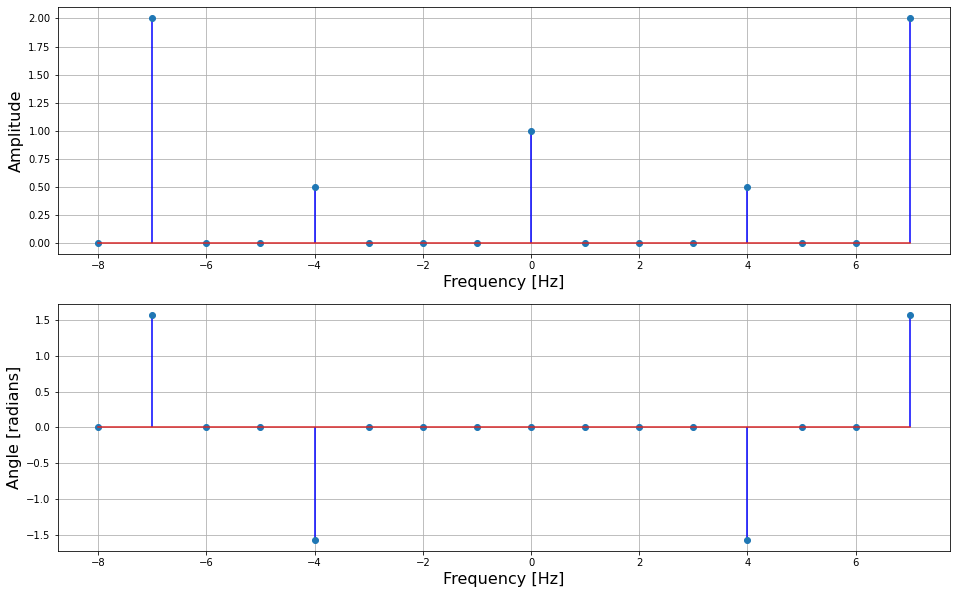

In [19]:
fs = 16   # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate reference signal
x = 1 + 4*np.cos(14*np.pi*t + np.pi/2) + np.cos(8*np.pi*t - np.pi/2)

# Compute DFT using your implementation
X = dft(x)

# Plot DFT spectrum
plot_DFT(X, fs=fs, only_positive_half=False)

### Questions#1

**Question**: What is the phase of the complex number when module (amplitude) is equal to zero?

**Anwser**: Faza dla amplitudy zero również wynosi 0.

## DFT as a linear map

DFT is a linear transformation and can be reformulated to the following form

$$\large
    \hat{\mathbf{x}} = \mathbf{E} \cdot \mathbf{x},
$$
where $\hat{\mathbf{x}} \in \mathbb{C}^{N}$, $\mathbf{E} \in \mathbb{C}^{N\times{}N}$, $\mathbf{x} \in \mathbb{R}^N$, and $N$ is the number of samples.

Implement DFT using matrix formulation. Figure out how to create matrix $\mathbf{E}$ based on the previously given formula of DFT.
Your implementation must not use any loops and be fully vectorized.

In [20]:
def mdft(x):
    """
    This function should compute Discrete Fourier Transform
    
    Parameters
    ----------
    x: numpy array of shape (N, )
        Vector containing samples of discrete signal in time domain.
    
    Returns
    -------
    X: numpy array of shape (N, )
        Vector containing samples of discrete signal in frequency domain.
    """
    N = len(x)
    n = np.arange(N)   # Indeks próbek
    k = n.reshape((N, 1))   # Indeks częstotliwościowy
    E = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(E, x)    # mnożenie macierzy E przez x
    
    return X

### Verify your implementation

RMSE: 1.3e-14
Your implementation succeeded


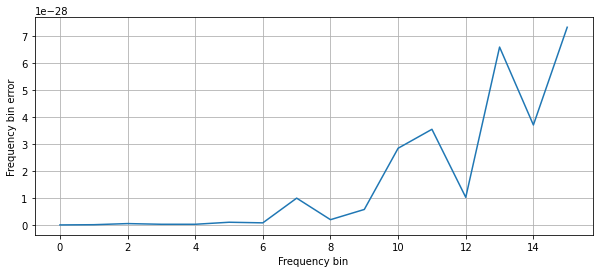

In [21]:
fs = 16  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Compute DFT using your implementation
X = mdft(x)

# Compute DFT using reference implementation from numpy
X_ref = np.fft.fft(x)

# Error between your implementation and reference implementation
X_err = np.abs(X - X_ref)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

### Questions#1

**Question**: For discrete signal of lenght $N$ is matrix $\mathbf{E}$ constant?

**Anwser**: Macierz E ma stałe wartości zmienia się tylko jej wymiar w zalezności od wartości N. 

### Interpretation

Since matrix $\mathbf{E}$ is a linear map, find the [orthonormal basis](https://en.wikipedia.org/wiki/Orthonormal_basis) of this map and investigate the vectors from the basis for different $N$.

In [22]:
from scipy.linalg import orth
def Orth_basis(N):
    n = np.arange(N)
    k = n.reshape((N,1))
    E = np.exp(-2j*np.pi*k*n/N)
    Orth_basis = orth(E)
    return Orth_basis

N = 4
print("Orthonormal basis shape:" ,np.shape(Orth_basis(N)),"\n")
print("Orthonormal basis of E matrix of",N ,"samples:\n\n", Orth_basis(N),"\n")

N = 7
print("Orthonormal basis shape:" ,np.shape(Orth_basis(N)),"\n")
print("Orthonormal basis of E matrix of",N ,"samples:\n\n", Orth_basis(N),"\n")

Orthonormal basis shape: (4, 4) 

Orthonormal basis of E matrix of 4 samples:

 [[-1.33230175e-01+0.15111385j -5.00000000e-01+0.j
  -1.14491749e-16+0.83521777j  8.73287565e-02-0.06480189j]
 [ 6.77026899e-01+0.25344035j -5.00000000e-01+0.j
  -1.86818197e-01-0.27476318j  1.22424336e-01-0.31940414j]
 [-3.29666854e-01+0.1143086j  -5.00000000e-01+0.j
  -3.81639165e-17-0.28569141j -7.25522488e-01+0.14230547j]
 [-2.14129870e-01-0.5188628j  -5.00000000e-01+0.j
   1.86818197e-01-0.27476318j  5.15769396e-01+0.24190057j]] 

Orthonormal basis shape: (7, 7) 

Orthonormal basis of E matrix of 7 samples:

 [[-1.24373212e-01+0.27285291j -2.09265492e-01-0.13520338j
  -2.78926611e-01+0.117554j   -3.77964473e-01+0.j
  -2.79935551e-01-0.3017616j   5.67113731e-01+0.09254162j
  -4.51769045e-02+0.33449602j]
 [ 4.13785315e-01+0.42618436j  1.92466183e-02+0.26216365j
   2.31330841e-01-0.02637809j -3.77964473e-01+0.j
  -4.91915195e-02+0.14765424j  1.54538306e-04+0.48777417j
  -5.98419755e-03-0.34467439j]
 [ 7.69

## Fast Fourier Transform

Implement DFT using [radix-2](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) Fast Fourier Transform (FFT).

In [23]:
def fft_radix2(x):
    """
    This function should compute Discrete Fourier Transform using Fast Fourier Transform (radix-2) algorithm.
    
    Parameters
    ----------
    x: numpy array of shape (2**k, )
        Vector containing samples of discrete signal in time domain.
        k is integer constant.
    
    Returns
    -------
    X: numpy array of shape (2**k, )
        Vector containing samples of discrete signal in frequency domain.
        k is integer constant.
    """
    
    N = len(x)
    N_min = min(N, 2)
    M = np.fft.fft(np.eye(N_min))
    X = np.dot(M, x.reshape(N_min, int(N/2)))
    
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd,
                       X_even - terms * X_odd])
    return X.ravel()

### Verify your implementation

RMSE: 1.4e-14
Your FFT implementation succeeded


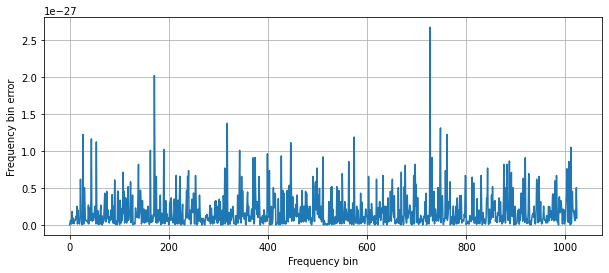

In [24]:
fs = 2**10  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Compute DFT using your implementation
X = fft_radix2(x)

# Compute DFT using reference implementation from numpy
X_ref = np.fft.fft(x)

# Error between your implementation and reference implementation
X_err = np.abs(X - X_ref)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your FFT implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

## Compare speed of DFT implementations

At this point we have four different implementations of DFT.
In this task you have to write a simple benchmark for those functions to check how fast each implementation can compute DFT for signal of length $N$.
In order to estimate this value you should execute $R$ times each investigated function for given signal of length $N$.
In result of the task you should obtain a four curves (for each function ) on figure where x axis corresponds to number of samples and y axis correspond to mean time of execution.

To measure time in Python you can use following snippet:
```Python
t_start = time.time()

# Block of code. For example:
time.sleep(1)

t_end = time.time()

duration = t_end - t_start
print(duration)

```

Since `fft_radix2` works only for signals of lenght $2^k :  k \in \mathbb{N}^+ $, you should choose
only signal of those lengths to test.
Below, there is a table which contain proposed maximal number of samples $2^K$ for each function.

| Implementation   | K     |
|:---------------- |:-----:|
| `dft`            | 8     |
| `mdft`           | 11    |
| `fft_radix2`     | 12    | 
| `np.fftpack.fft` | 22    |

Blow is a started code that you can use.

In [25]:
# Number of repetitions for each test point on characteristic
R = 100

# Dictionary containing DFT implementation with corresponding K value
DFT_IMPLEMENTATIONS_LIST = {
    'dft':        (dft, 8),
    'mdft':       (mdft, 11),
    'fft_radix2': (fft_radix2, 12),
    'fft':        (np.fft.fft, 22),
}

# This is a dict where you should store your results as a tuple (test_N, time)
# where test_N is a vector containing number of samples for which function was tested
# and time is a vector that containing mean execution time for signal of length N from test_N
results = {
    'dft':        None,
    'mdft':       None,
    'fft_radix2': None,
    'fft':        None,
}

for name, (fft, K) in tqdm(DFT_IMPLEMENTATIONS_LIST.items()):
    
    N = np.asarray([2**k for k in range(1, K)])
    
    # Put your code here
    compute_time = []
    for i in range(len(N)):
        t = np.linspace(0, 1, N[i])
        x = np.random.randn(*t.shape)
        
        t_start = time.time()
        x = fft(x)
        t_end = time.time()
        speed = t_end - t_start
        compute_time.append(speed)
    
    results[name] = (N, compute_time)

  0%|          | 0/4 [00:00<?, ?it/s]

### Plot the results

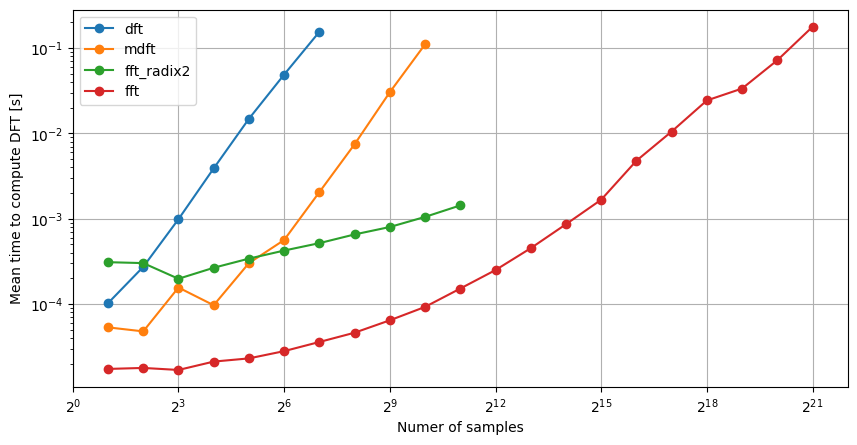

NameError: name 'T1' is not defined

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=100)

for name, (test_N, r) in results.items():
    ax.plot(test_N, r, 'o-', label=name)

ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
    
ax.set_ylabel('Mean time to compute DFT [s]')
ax.set_xlabel('Numer of samples')
ax.legend()
ax.grid()
plt.show()
print("Czas wykonania dft:",T1)
print("Czas wykonania mdft:",T2)
print("Czas wykonania fft_radix2:",T3)
print("Czas wykonania fft:",T4)

### Question

**Question**: Consider $N$ samples of signal. Does the computation time of the DFT depends on the values of the singal?

**Anwser**: Nie zależy od wartości sygnału tylko rozmiaru macierzy E.

**Question**: What are theoretical computetional complexity of those implementations? 

**Anwser**: Obliczanie DFT wymaga N^2 operacji. FFT znacznie zmniejsza tą liczbę do N*logN operacji.

**Question**: Explain why different implementation of DFT have particular curve on the characteristics obtained in figur from section 2.5.1.

**Anwser**: Różnice wynikają ze specyfiki danej implementacji i jej złożoności obliczeniowej.

## Inverse Discrete Fourier Transform (iDFT)

Implement [iDFT](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Inverse_transform) operation.

<div style="border: solid; padding: 20px">
<b style="font-size: 12pt">Inverse Discrete Fourier Transform (iDFT)</b>
$$\large
    {\mathbf{x}}[n] = \frac{1}{N} \sum_{n=0}^{N-1} \hat{\mathbf{x}}[k] \exp\left( j2\pi \frac{kn}{N} \right)
$$
</div>

In [14]:
def idft(X):
    """
    This function should compute inverse Discrete Fourier Transform using naive implementation.
    
    Parameters
    ----------
    X: numpy array of shape (N, )
        Vector containing samples of discrete signal in frequency domain.
    
    Returns
    -------
    x: numpy array of shape (N, )
        Vector containing samples of discrete signal in time domain.
    """
    
    x = []
    for k in range(len(X)):
        sum = 0
        for n in range(len(X)):
            sum += (1/len(X)) * X[n] * np.exp(complex(0,2*np.pi*k*n/len(X)))
        x.append(sum)
    return x

### Verify your implementation

RMSE: 1.7e-14
Your implementation succeeded


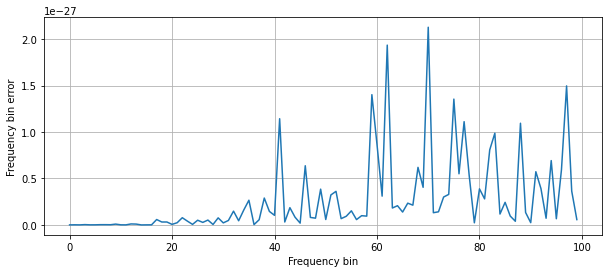

In [15]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)

# Error between your implementation and reference implementation
X_err = np.abs(x - idft(np.fft.fft(x)))**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

### Question#1

**Question**: Since DFT is a linear mapping it can be expressed as $\hat{\mathbf{x}} = \mathbf{E} \cdot \mathbf{x}$. Can we express inveres DFT as linear map $\mathbf{B}$ as well? Is there any relation between $\mathbf{E}$ and $\mathbf{B}$?

**Anwser**: Tak również IDFT możemy wyrazić jako odwzorowanie liniowe. Zachodzi następująca zależność: 
$\mathbf{B} = \mathbf{E}^{-1} \cdot \hat{\mathbf{x}}$

## Numerical error of DFT

In this task you should examine the numerical error introduced by iteratively applied DFT/iDFT operation on a sampled signal.
In the $i^{\text{th}}$ iteration compute vector $\mathbf{x}_{i+1}$ as
$$
    \mathbf{x}_{i+1} = \mathrm{DFT}\Big(\mathrm{iDFT}\big(\mathbf{x}_{i} \big)\Big)
    \quad \text{ where } \mathbf{x}_{0} = \mathbf{x}_{\mathrm{ref}}
$$
and store RMSE in `err` list for each iteration between vector $\mathbf{x}_{i+1}$ and $\mathbf{x}_{\mathrm{ref}}$.

Since in this task you have to iterate about 1000 times to get proper curve, you should use `np.fft.fft` and `np.fft.ifft` functions to perform `DFT` and `iDFT` quickly.

RMSE: 0.0
Your implementation succeeded


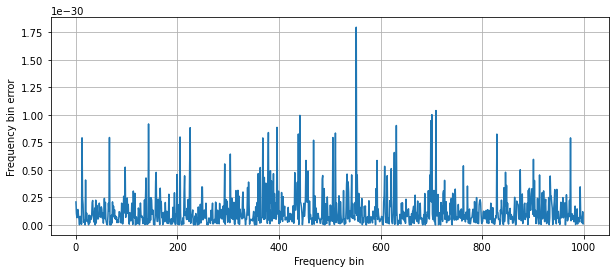

In [16]:
fs = 1e3  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = np.random.randn(*t.shape)
#x = 1 + 4*np.cos(14*np.pi*t+np.pi/2) + np.cos(8*np.pi*t-np.pi/2)


X_DFT = np.fft.fft(x)
X_IDFT = np.fft.ifft(X_DFT)


# Error between your implementation and reference implementation
X_err = np.abs(x - X_IDFT)**2

# RMSE
X_RMSE = np.sqrt(np.mean(X_err))

print('RMSE:', np.round(X_RMSE, 15))
print('Your implementation succeeded' if X_RMSE < 1e-10 else 'That RMSE is a little bit too BIG!')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(X_err)
ax.set_ylabel('Frequency bin error')
ax.set_xlabel('Frequency bin')
plt.grid()
plt.show()

## Spectral Leakage

This task assumes that you are familiar with [spectral leakage](https://en.wikipedia.org/wiki/Spectral_leakage) and [window functions](https://en.wikipedia.org/wiki/Window_function). If not feel free to read about them in wikipedia/lectures/literature.

Consider a case when there are two frequency components in the signal. The first signal has amplitude of 1 and the second one has an amplitude of 0.01. If the frequencies of those compontents hits frequency bins then we will see two distinct peaks as in the example below

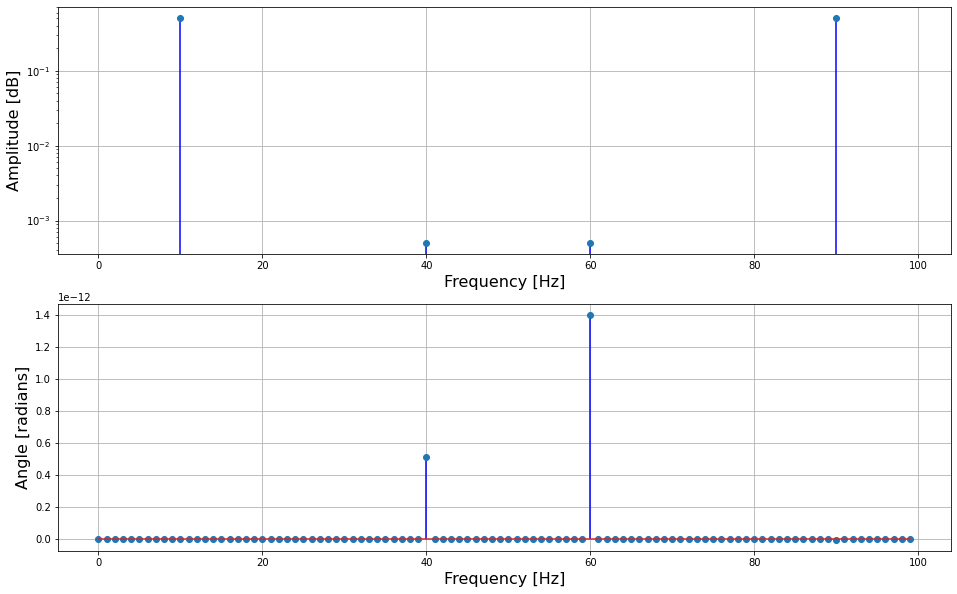

In [70]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
n = np.random.randn(t.size)
x = 1e-3*np.cos(2*np.pi*40*t) + np.cos(2*np.pi*10*t)

# Compute DFT
X = dft(x)

# Plot the spectrum
plot_DFT(X, fs=fs, dB=True)

But if the stronger peak has different frequency than frequency bins, spectral leakage spoils the fun!
Modify below code that the peak of the sinusoidal component with frequency 40 [Hz] will be visible in the spectrum.

No, you can't change the signal.

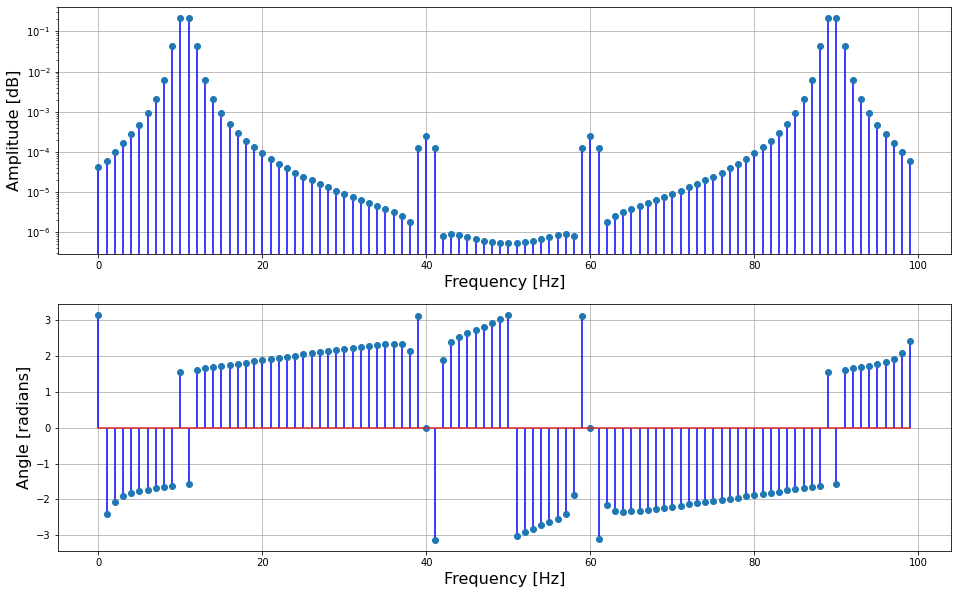

In [27]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = 1e-3*np.cos(2*np.pi*40*t) + np.cos(2*np.pi*10.5*t)

#####
# The the magic here.
#####
x = np.hanning(len(x))*x

X = dft(x)

plot_DFT(X, fs=fs, dB=True)

### Question#1

**Question**: Which window provides best frequency resolution (narrower main lobe)?

**Anwser**: Najwęższy listek główny ma okno prostokątne, jednak z uwagi na fakt, że powoduje słabą rozróżnialność amplitudy częściej używamy pozostałych rodzajów okien.

### Question#2

**Question**: Which window provides worst dynamic range?

**Anwser**: Okno prostokątne.

# Zero-padding

What effect in the frequency domain does adding samples with amplitude zero to the end of a discrete signal have?
Create a simple script that will present this effect and explain how it works.

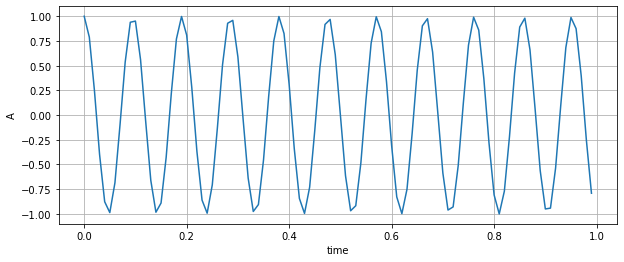

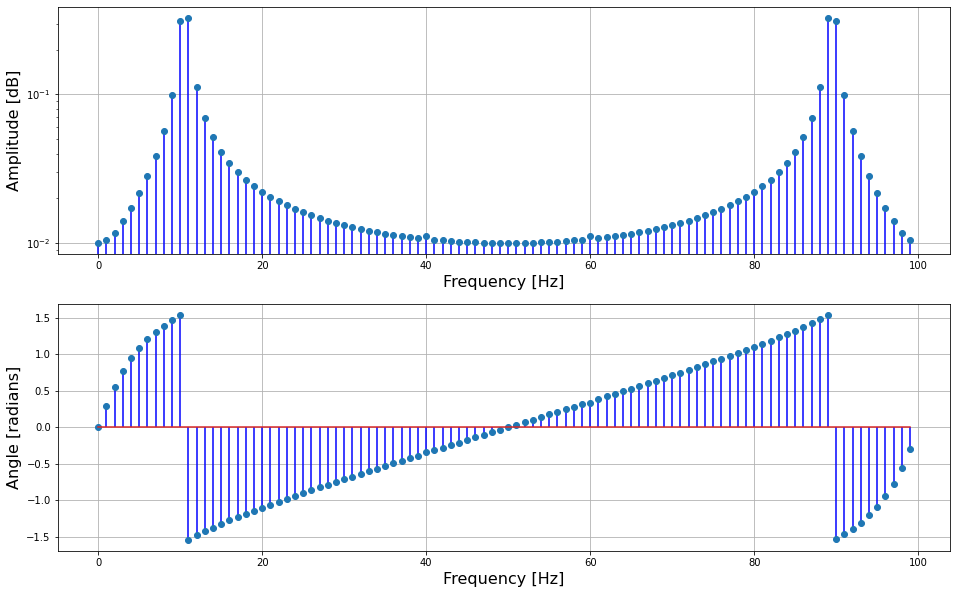

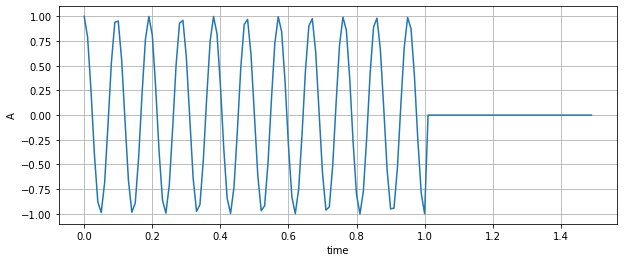

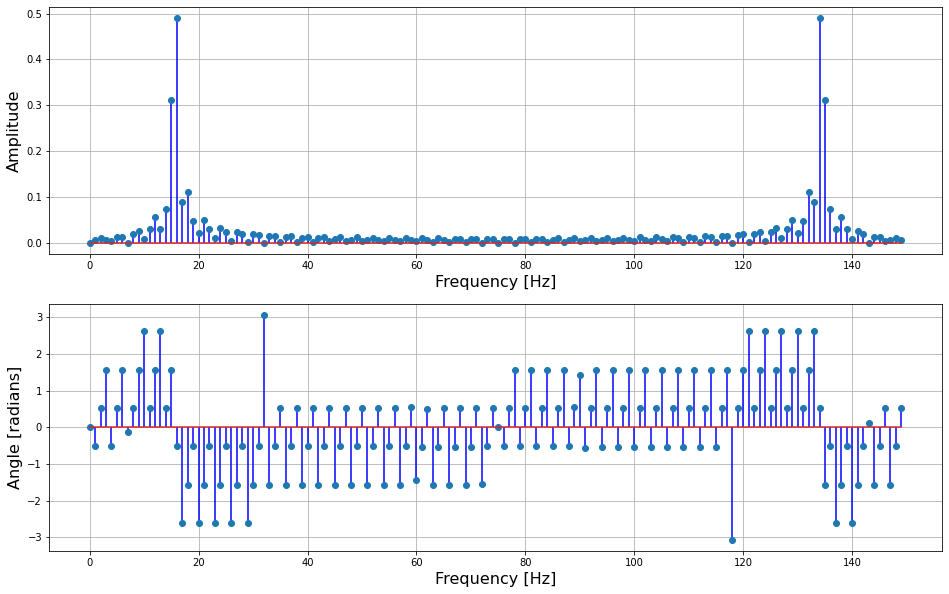

In [18]:
# Put your code here
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
x = 1e-3*np.cos(2*np.pi*40*t) + np.cos(2*np.pi*10.5*t)

X = dft(x)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(t,x)
ax.set_ylabel('A')
ax.set_xlabel('time')
plt.grid()
plt.show()

plot_DFT(X, fs=fs, dB=True)

# Zera na koniec sygnału

fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
zera = np.zeros(20)
t = np.arange(0, 1.5 , dt)

x = 1e-3*np.cos(2*np.pi*40*t) + np.cos(2*np.pi*10.5*t)

for i in range(np.size(t)):
    if(t[i]>1):
        x[i] = 0


X = dft(x)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(t,x)
ax.set_ylabel('A')
ax.set_xlabel('time')
plt.grid()
plt.show()

plot_DFT(X, fs=fs)

# Frequency Aliasing

Write a script that will present the effect of the aliasing in the frequency domain.

Next, Write a function that calculates the frequency from the band $(0, \frac{fs}{2})$ in which a given aliasing frequency will appear.
For example, when sinusoidal signal with frequency $75 Hz$ is sampled with rate $f_s = 100$, it will be visible in the spectrum for bin corresponding with frequency $25 Hz$.
```
freq_aliasin(75, 100) -> 25
```

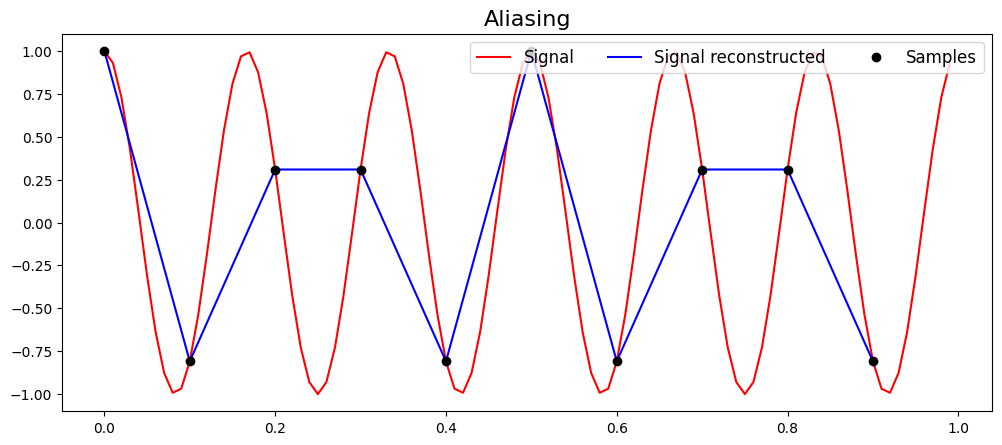

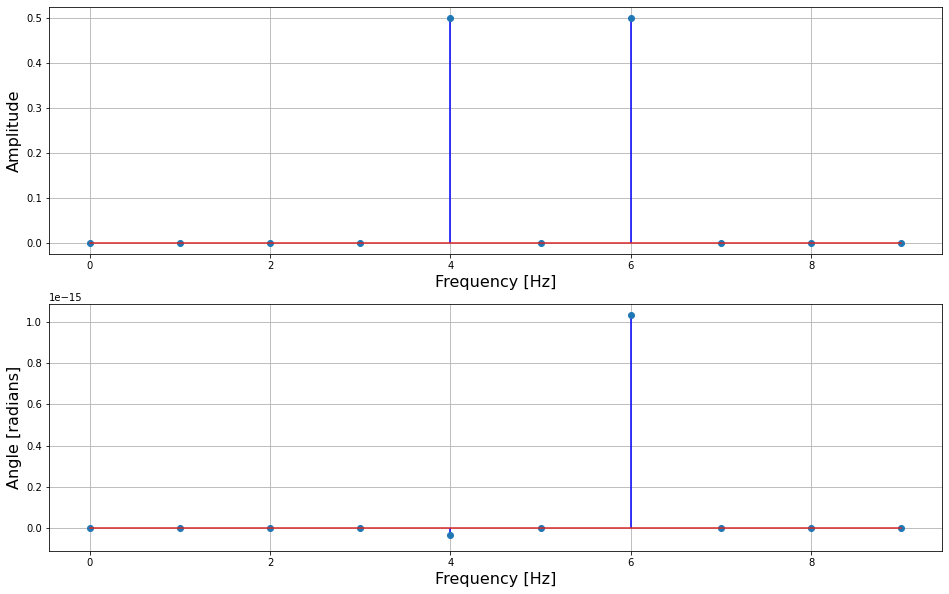

In [18]:
# Put your code here
fs1 = 100      # Sampling frequency
dt1 = 1/fs1     # Sampling interval
t_s = 0         # Start of sampling 
t_s = 1         # End of sampling 

fs2 = 10       # Niespełnione założenie o częstotliwości próbkowania.
dt2 = 1/fs2

# Generate timestamps of samples
t1 = np.arange(0,1,dt1)
t2 = np.arange(0,1,dt2)

# Generate signal
f = 6     # Signal frequency
y1 = np.cos(2*np.pi*f*t1)
y2 = np.cos(2*np.pi*f*t2)

X = dft(y2)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), dpi=100)

ax1.plot(t1,y1,'r', label='Signal')
ax1.plot(t2,y2,'b', label='Signal reconstructed')
ax1.plot(t2,y2,'ko', label='Samples')
ax1.legend(ncol=3, fontsize=12, loc='upper right')
ax1.set_title('Aliasing',fontsize=16)

plot_DFT(X, fs=fs2)


In [4]:
def freq_aliasin(f_a, fs):
    """
    
    Parameters
    ----------
    f_a: float
        Aliasing frequency
    fs: float
        Sampling rate (Sampling frequency)
        
    Returns
    -------
    f_b: float
        
    """
    N = 5 # Dla okreslonej ilości harmonicznych
    f_b = []
    for n in range(1,N+1):
        f_b.append(abs(n*fs-f_a)) 
    return print("Dla N =",N," harmonicznych częstotliwość w widmie wynosi kolejno :", f_b)

# Short-Time Fourier Transform

This section is optional.

1. Implement function that computes STFT of given signal, for given analysis window and hop/overlap.
2. Implement function that will plot spectogram of the STFT.
3. Implement a iSTFT function that will synthesis time-domain signal from STFT.